In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 나눔고딕 설치
!apt-get -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()


In [ ]:
import pandas as pd
import numpy as np


file_path = '/content/drive/MyDrive/data_038_1.csv'

df_raw = pd.read_csv(file_path)
df_raw.head

<bound method NDFrame.head of        P1     P2  P3  P4  P5  P6   P7  B1  B2  B3  ...  B165  B166      B167  \
0       M  20대_후   1   1   0   0  A은행   0   0   0  ...     0     0   4350000   
1       M  50대_후   1   0   0   0  A은행   0   0   0  ...     0     0    580000   
2       M  40대_후   1   1   0   0  A은행   0   0   0  ...     0     0   1950000   
3       F  60대_초   1   1   0   0  A은행   0   0   0  ...     0     0  43000000   
4       M  30대_후   0   1   0   0  B은행   0   0   0  ...     0     0   4910000   
...    ..    ...  ..  ..  ..  ..  ...  ..  ..  ..  ...   ...   ...       ...   
473223  F  40대_초   0   1   0   1  B은행   0   0   0  ...     0     0    650000   
473224  M  20대_후   1   1   0   0  A은행   0   0   0  ...     0     0   4790000   
473225  F  40대_후   1   1   1   0  B은행   0   0   0  ...     0     0   1650000   
473226  M  60대_후   1   1   1   0  A은행   0   0   0  ...     0     0   1340000   
473227  F  50대_초   1   0   0   0  B은행   0   0   0  ...     0     0    750000   

         

In [ ]:
df_p = df_raw.iloc[:, :7]       # 신청정보: 22.6月 신한카드 여신 서비스 신청과 관련된 정보		
df_b = df_raw.iloc[:, 7:174]    # 결제정보: 22.6月 신한카드를 통한 결제정보		
df_c = df_raw.iloc[:, 174]      # 이용건수
df_e = df_raw.iloc[:, 175:181]  # 기타정보: 21.5 ~ 22.5 이용 패턴 코드
# 패턴코드: 1~12개월 이용 패턴 (12자리)
# 해달 월 50만원 이상 사용 시 1
# 해달 월 50만원 미만 사용 시 0

# 새 섹션

In [ ]:
idx_1 = np.where(df_p.iloc[:,2] == 1)[0]    # P3 = 1
idx_0 = np.where(df_p.iloc[:,2] == 0)[0]    # P3 = 0

In [ ]:
idx_f = np.where(df_p.iloc[:,0] == "F")[0]  # female
idx_m = np.where(df_p.iloc[:,0] == "M")[0]  # male

In [ ]:
idx_20_h = np.where(df_p.iloc[:,1] == "20대_초")[0]
idx_20_t = np.where(df_p.iloc[:,1] == "20대_후")[0]
idx_30_h = np.where(df_p.iloc[:,1] == "30대_초")[0]
idx_30_t = np.where(df_p.iloc[:,1] == "30대_후")[0]
idx_40_h = np.where(df_p.iloc[:,1] == "40대_초")[0]
idx_40_t = np.where(df_p.iloc[:,1] == "40대_후")[0]
idx_50_h = np.where(df_p.iloc[:,1] == "50대_초")[0]
idx_50_t = np.where(df_p.iloc[:,1] == "50대_후")[0]
idx_60_h = np.where(df_p.iloc[:,1] == "60대_초")[0]
idx_60_t = np.where(df_p.iloc[:,1] == "60대_후")[0]

In [ ]:
#%%#한글 오류 해결
import matplotlib
from matplotlib import font_manager, rc
import platform
try:
    if platform.system() == 'Windows':
        # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:
        # Mac인 경우
        rc('font', family='AppleGothic')
except:
    pass
matplotlib.rcParams['axes.unicode_minus'] = False


In [ ]:
#총 금액 없이 카테고리별 묶음
#path = os.chdir(r"/Users/kylee/Desktop/대외활동및공부/신한빅데이터해커톤")
#os.listdir()
#데이터 불러오기
#df1 = pd.read_csv("data_038_1.csv", header = 0 )
#df2 = pd.read_excel("schema.xlsx")
#df1.head()
temp_dat = df_raw.copy()

temp_dat['숙박'] = 0
temp_dat['식료품'] = 0
temp_dat['의류및신발'] = 0
temp_dat['요금'] = 0
temp_dat['가정용품및가사서비스'] = 0
temp_dat['보건'] =0
temp_dat['교통'] =0
temp_dat['통신'] =0
temp_dat['오락및문화'] =0
temp_dat['교육'] =0
temp_dat['기타'] =0
temp_dat['쇼핑몰기타'] =0
temp_dat['사치품'] =0
temp_dat['교통수단_관리'] =0
temp_dat['제조업'] =0
temp_dat['전문서비스'] =0
temp_dat['생활서비스'] =0
temp_dat['장비및화물운송'] =0
temp_dat['농업'] =0
temp_dat['전자기기'] =0



for i in range(1, 167):
    if (i >= 1 and i <= 5):
        temp_dat['숙박'] += temp_dat[f"B{i}"]
    elif(i == 15 or i == 17 or i == 20 or (i<= 27 and i >= 22) or (i<= 31 and i >= 29) or (i<= 42 and i >= 35) ):
        temp_dat['식료품'] += temp_dat[f"B{i}"]
    elif ((i <= 66 and i >= 63) or (i <= 71 and i >= 68)):
        temp_dat['의류및신발'] += temp_dat[f"B{i}"]
    elif (i == 157  or (i <= 78 and i >= 72)):
        temp_dat['사치품'] += temp_dat[f"B{i}"]
    elif((i<= 14 and i >= 13) or i == 16 or (i<= 19 and i >= 18) or i == 21  ):
        temp_dat['쇼핑몰기타'] += temp_dat[f"B{i}"]
    elif(i == 12 or (i<= 164 and i >= 161) ):
        temp_dat['요금'] += temp_dat[f"B{i}"]
    elif(i == 34 or (i<= 60 and i >= 43) or i == 67 or i == 93 or (i<= 112 and i >= 109) or (i<= 117 and i >= 114)  ):
        temp_dat['가정용품및가사서비스'] += temp_dat[f"B{i}"]
    elif((i<= 107 and i >= 106) or (i<= 149 and i >= 139) ):
        temp_dat['보건'] += temp_dat[f"B{i}"]
    elif((i <= 11 and i >= 7) or i == 118):
        temp_dat['교통'] += temp_dat[f"B{i}"]
    elif(i <= 62 and i >= 61):
        temp_dat['통신'] += temp_dat[f"B{i}"]
    elif(i == 6 or (i <= 90 and i >= 79) or (i <= 105 and i >= 97) or (i <= 121 and i >= 120) or i== 123 or i ==134 or (i <= 138 and i >= 137) ):
        temp_dat['오락및문화'] += temp_dat[f"B{i}"]
    elif((i <= 92 and i >= 91) or i == 94 or i == 108 or i == 122 or (i <= 156 and i >= 155) or i == 160):
        temp_dat['교육'] += temp_dat[f"B{i}"]
    elif((i <= 159 and i >= 158) or i == 119 or  (i <= 166 and i >= 165) ):
        temp_dat['교통수단_관리'] += temp_dat[f"B{i}"]
    elif((i <= 151 and i >= 150) ):
        temp_dat['제조업'] += temp_dat[f"B{i}"]
    elif((i <= 132 and i >= 129) ):
        temp_dat['전문서비스'] += temp_dat[f"B{i}"]
    elif((i <= 128 and i >= 127) or i == 133 or  (i <= 136 and i >= 135) or i == 154):
        temp_dat['생활서비스'] += temp_dat[f"B{i}"]
    elif((i <= 126 and i >= 124) ):
        temp_dat['장비및화물운송'] += temp_dat[f"B{i}"]
    elif(i == 28 ):
        temp_dat["농업"] += temp_dat[f"B{i}"]  
    elif(i == 33 ):
        temp_dat["전자기기"] += temp_dat[f"B{i}"]  
    else:
        temp_dat['기타'] += temp_dat[f"B{i}"]

        
#총 금액

#데이터 불러오기
temp_dat_total = df_raw.copy()
temp_dat_total = temp_dat_total["B167"]
temp_dat_total

0          4350000
1           580000
2          1950000
3         43000000
4          4910000
            ...   
473223      650000
473224     4790000
473225     1650000
473226     1340000
473227      750000
Name: B167, Length: 473228, dtype: int64

In [ ]:
q1 = temp_dat['B167'].quantile(q=0.25, interpolation='nearest')  # q1 quantile
q2 = temp_dat['B167'].quantile(q=0.5, interpolation='nearest')  # q2 quantile
q3 = temp_dat['B167'].quantile(q=0.75, interpolation='nearest')  # q3 quantile
q4 = temp_dat['B167'].quantile(q=0.8, interpolation='nearest')  # q4 quantile
q5 = temp_dat['B167'].quantile(q=0.85, interpolation='nearest')  # q5 quantile
q6 = temp_dat['B167'].quantile(q=0.9, interpolation='nearest')  # q6 quantile




# 매출을 구간에 따라 나눠줌 (sell_rank 열에 넣어줌)
consume_rank = pd.cut(temp_dat['B167'],
                   bins=[0, q1, q2, q3, q4, q5, q6,  np.inf],
                   right=False,
                   labels=["7등급","6등급","5등급","4등급", "3등급", "2등급", "1등급"])
temp_dat["consume_rank"] = consume_rank


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글이 안나올 때
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

In [ ]:
# plt.figure(figsize=(30,14))
# sns.set(font_scale=1)  # 글자 크기 설정
# sns.barplot(data=df_b.iloc[idx_1,:-1].mean().reset_index(drop=False), x='index', y=0, alpha=.5, color='red')
# sns.barplot(data=df_b.iloc[idx_0,:-1].mean().reset_index(drop=False), x='index', y=0, alpha=.5, color='blue')
# plt.xticks(rotation=45)
# plt.tight_layout()      # 그래프가 꽉 차게

In [ ]:
# res1 = df_b.iloc[idx_1,:-1].mean()
# res2 = df_b.iloc[idx_0,:-1].mean()
# is_1_lt_0 = res1 < res2
# diff_ratio = []
# for i in range(166):
#   diff = 0
#   if is_1_lt_0[i]:
#     a = res1[i]
#     b = res2[i]
#   else:
#     a = res2[i]
#     b = res1[i]
#   diff_ratio.append(b/a)

In [ ]:
# threshold = 1.5
# d = diff_ratio + [0]
# column_lg_diff = np.where(np.array(d)>threshold)[0]
# column_sm_diff = np.where(np.array(d)<threshold)[0]
# column_lg_diff

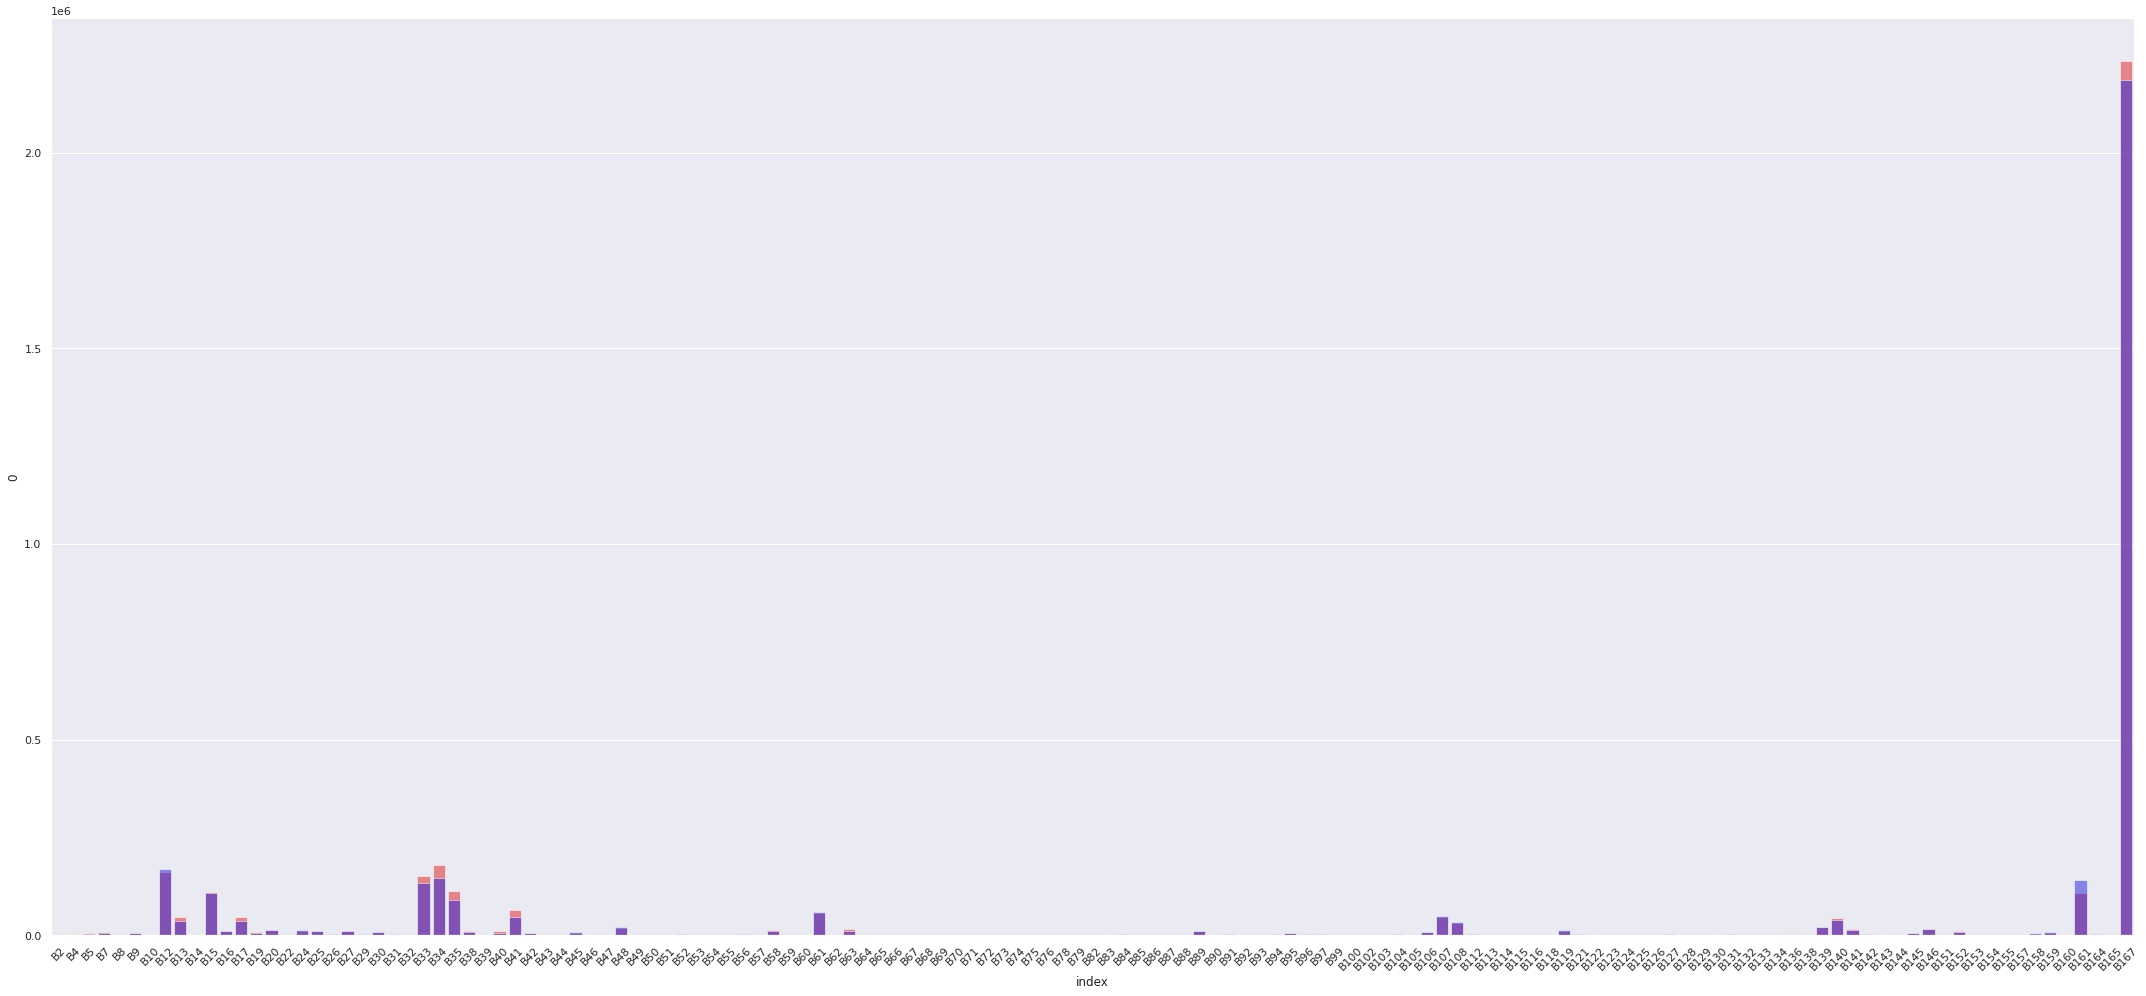

In [ ]:
# plt.figure(figsize=(30,14))
# sns.set(font_scale=1)  # 글자 크기 설정
# sns.barplot(data=df_b.iloc[idx_1,column_sm_diff].mean().reset_index(drop=False), x='index', y=0, alpha=.5, color='red')
# sns.barplot(data=df_b.iloc[idx_0,column_sm_diff].mean().reset_index(drop=False), x='index', y=0, alpha=.5, color='blue')
# plt.xticks(rotation=45)
# plt.tight_layout()      # 그래프가 꽉 차게

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

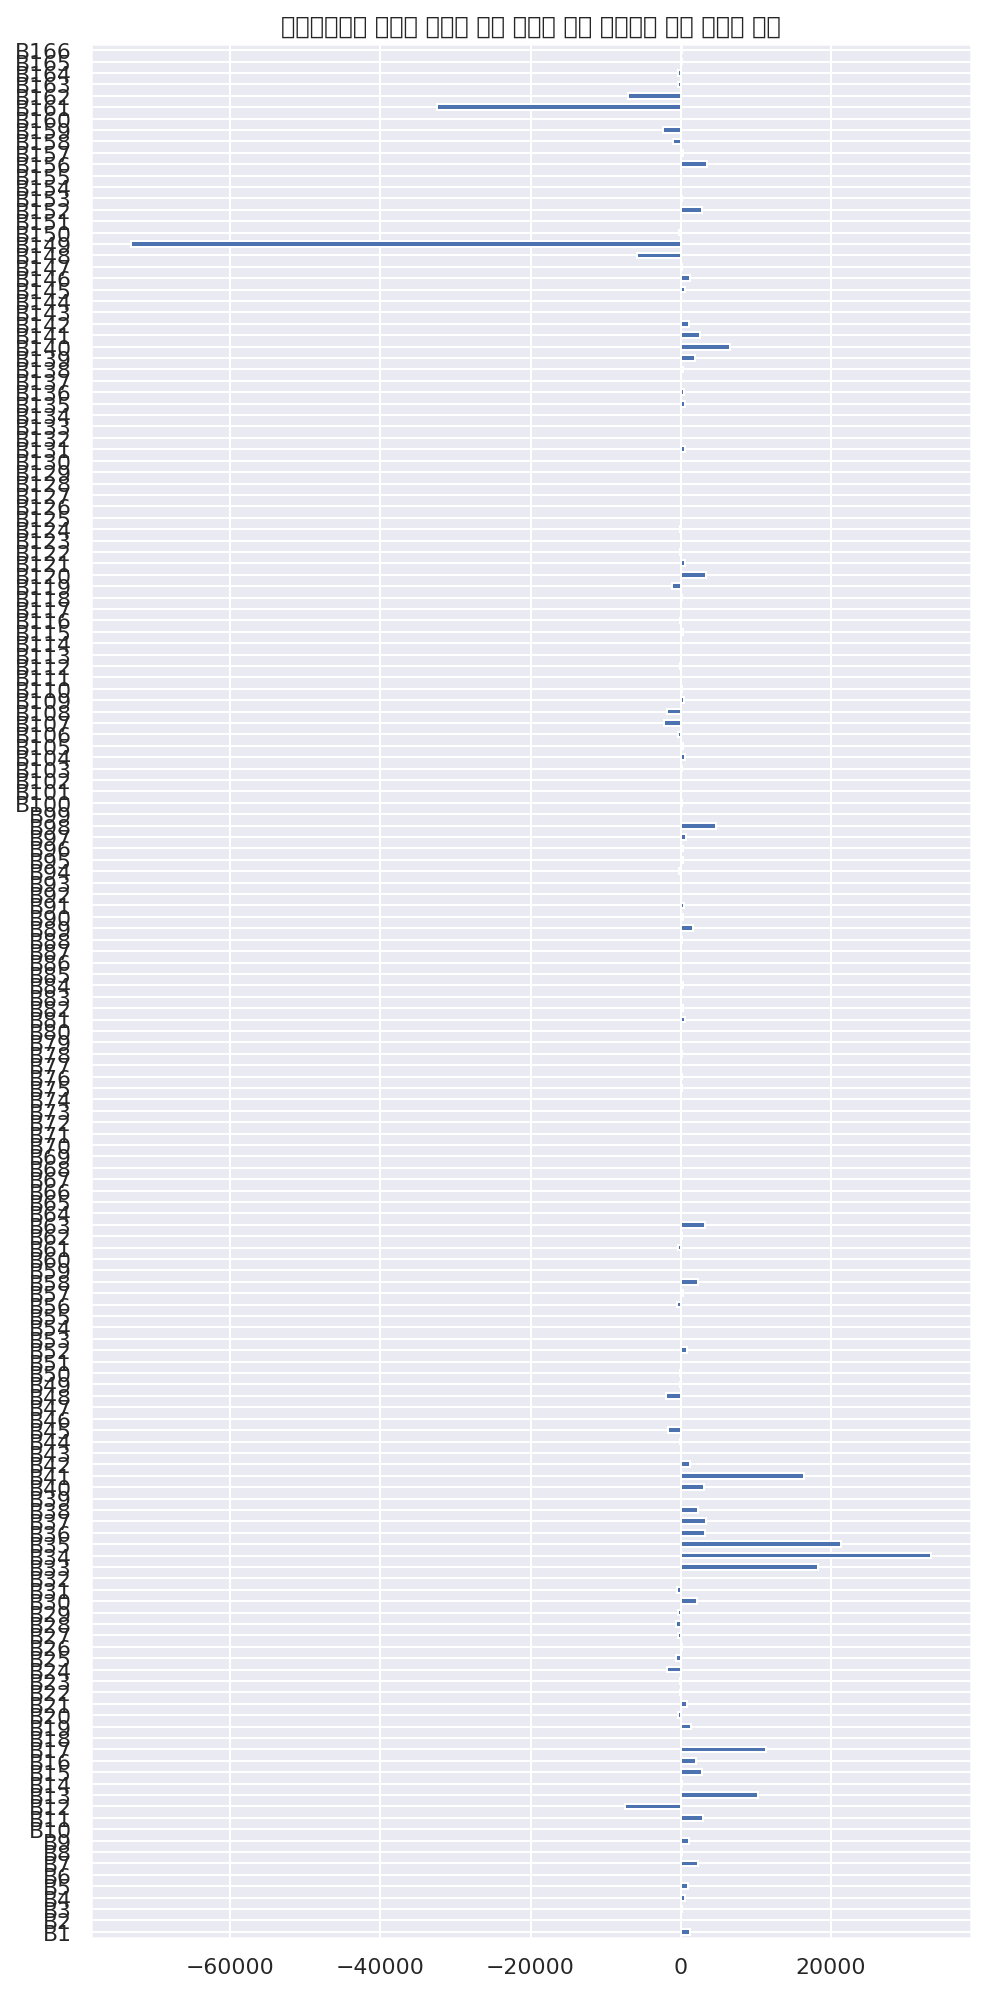

In [ ]:
# # 결제 계좌에 따른 소비

# font = fm.FontProperties(fname=fontpath).get_name()
# rc('font', family=font)

# plt.figure(figsize=(7,14))
# diff = df_b.iloc[idx_1, :-1].mean().round(3) - df_b.iloc[idx_0, :-1].mean().round(3)
# plt.title("신한은행추정 고객과 그렇지 않은 고객의 따른 카테고리 평균 지출액 비교")
# diff.plot.barh(x=diff.index, y=diff.values);
# plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

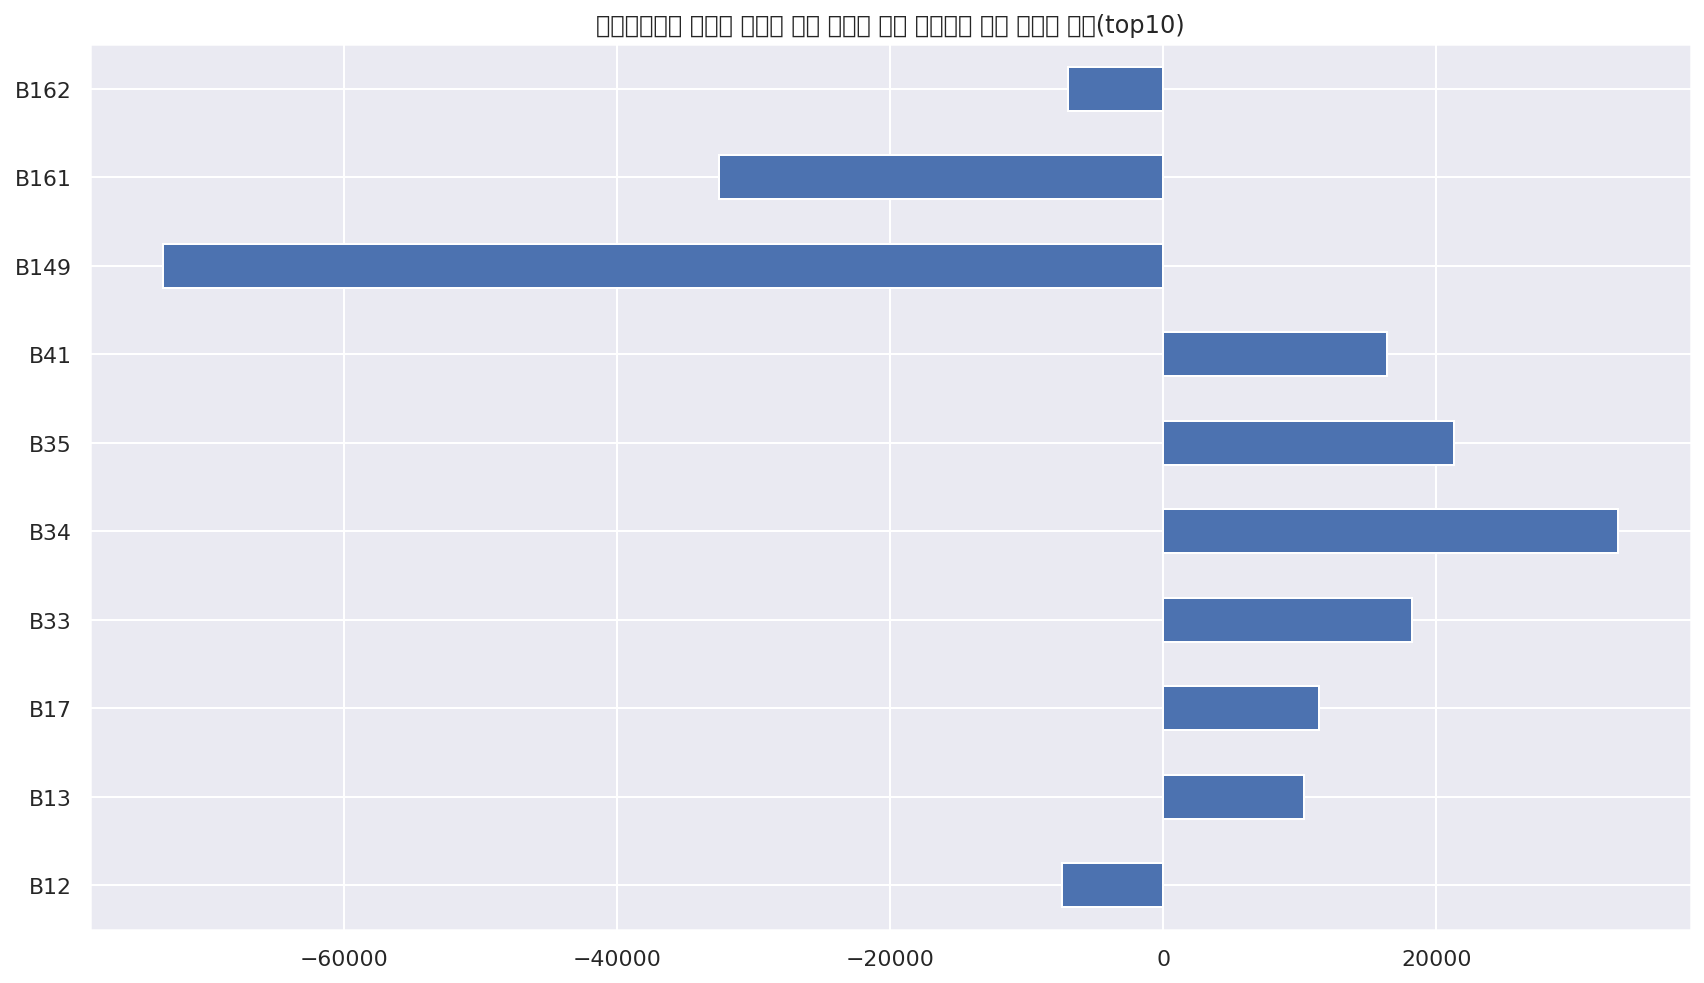

In [ ]:
# idx_top_10 = diff.abs().sort_values(ascending=False)[:10].index
# plt.figure(figsize=(12,7))
# plt.title("신한은행추정 고객과 그렇지 않은 고객의 따른 카테고리 평균 지출액 비교(top10)")
# d2 = diff[idx_top_10]
# d2.index = [int(x[1:]) for x in d2.index]
# d2 = d2.sort_index()
# d2.index = ['B'+str(x) for x in d2.index]
# d2.plot.barh(x=d2.index, y=d2.values);
# plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_

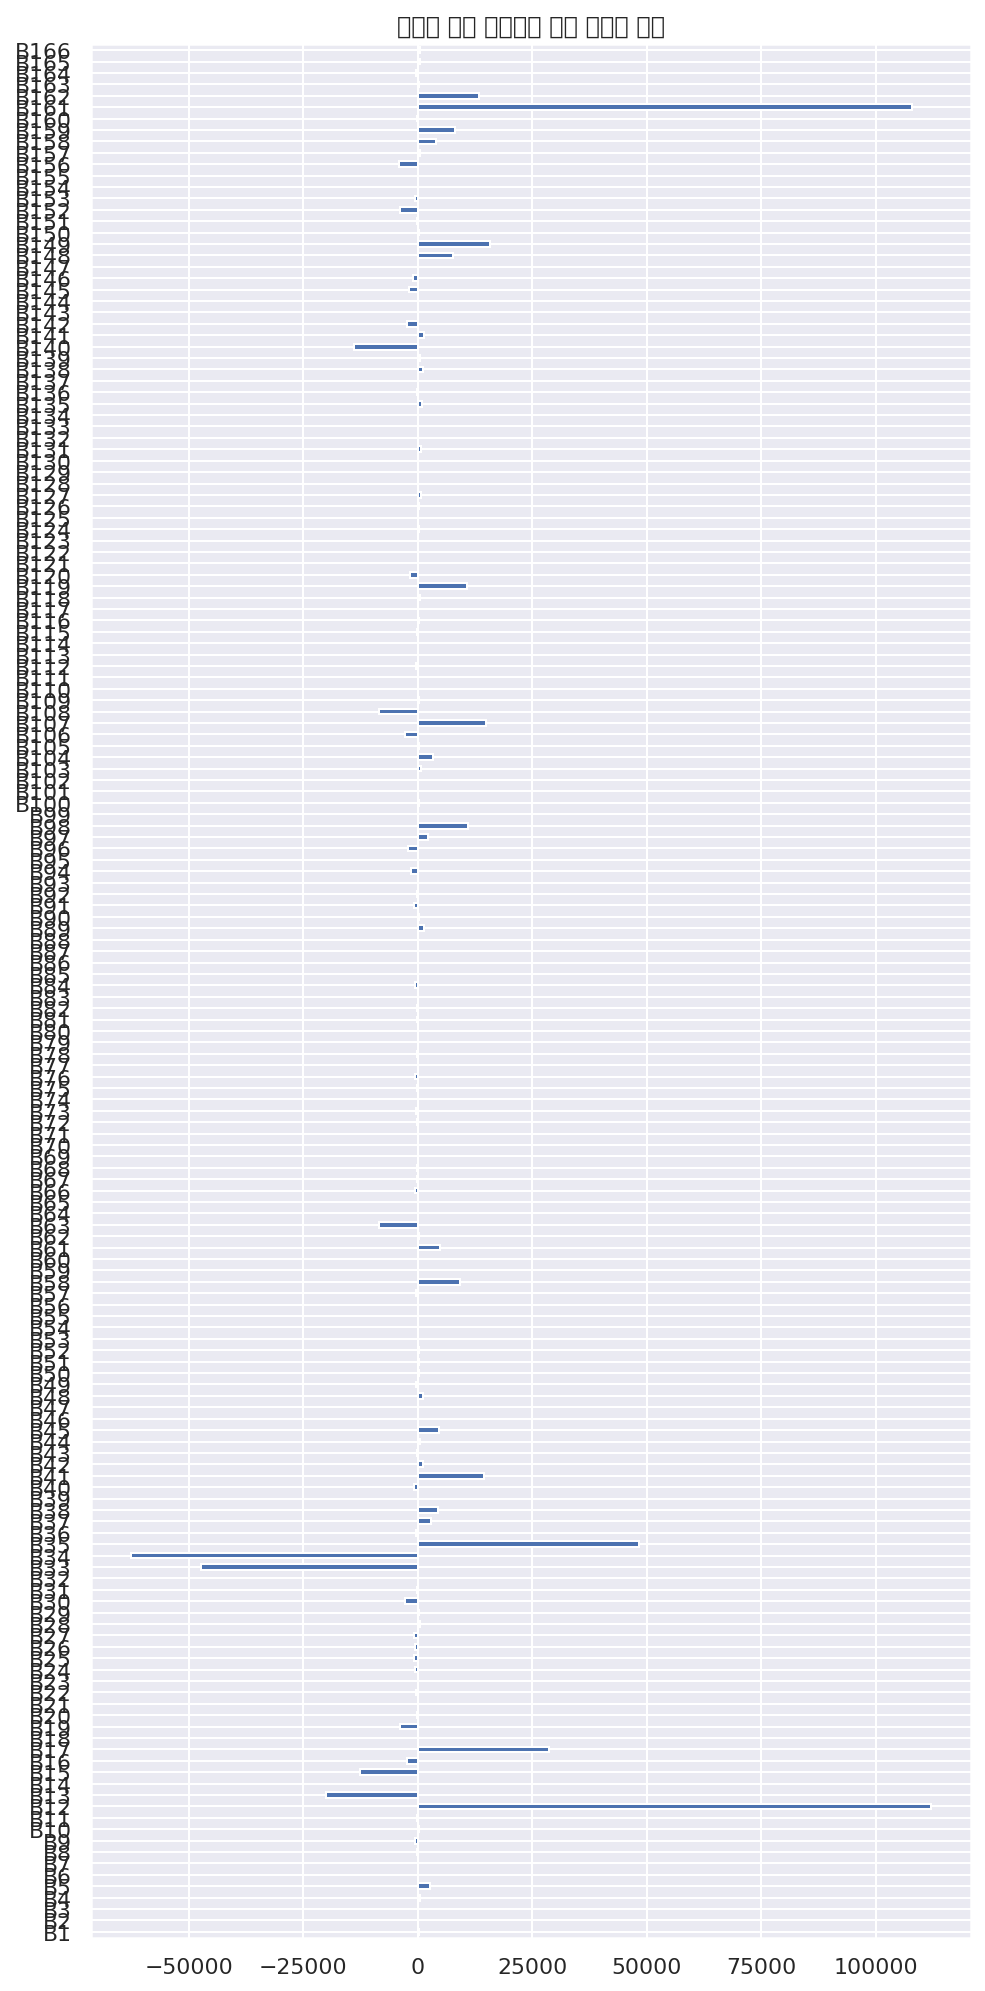

In [ ]:
# # 성별에 따른 소비
# plt.figure(figsize=(7,14))
# diff = df_b.iloc[idx_m, :-1].mean().round(3) - df_b.iloc[idx_f, :-1].mean().round(3)
# plt.title("성별에 따른 카테고리 평균 지출액 비교")
# diff.plot.barh(x=diff.index, y=diff.values);
# plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_

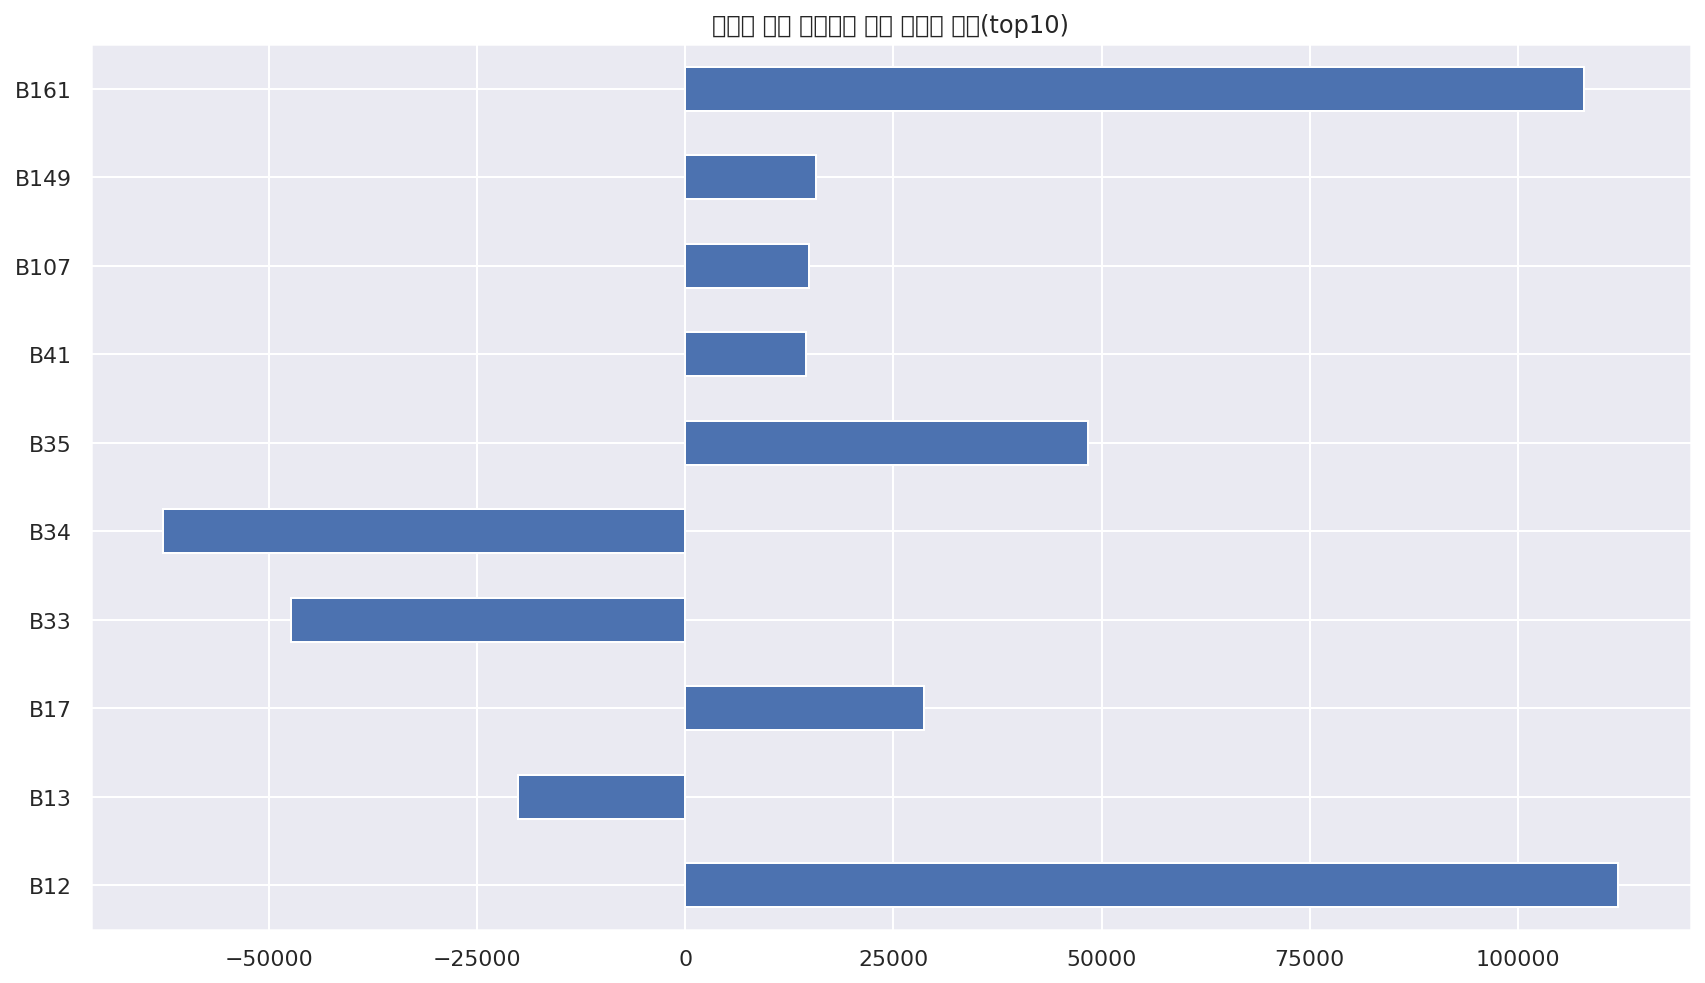

In [ ]:
# idx_top_10 = diff.abs().sort_values(ascending=False)[:10].index
# plt.figure(figsize=(12,7))
# plt.title("성별에 따른 카테고리 평균 지출액 비교(top10)")
# d2 = diff[idx_top_10]
# d2.index = [int(x[1:]) for x in d2.index]
# d2 = d2.sort_index()
# d2.index = ['B'+str(x) for x in d2.index]
# d2.plot.barh(x=d2.index, y=d2.values);
# plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

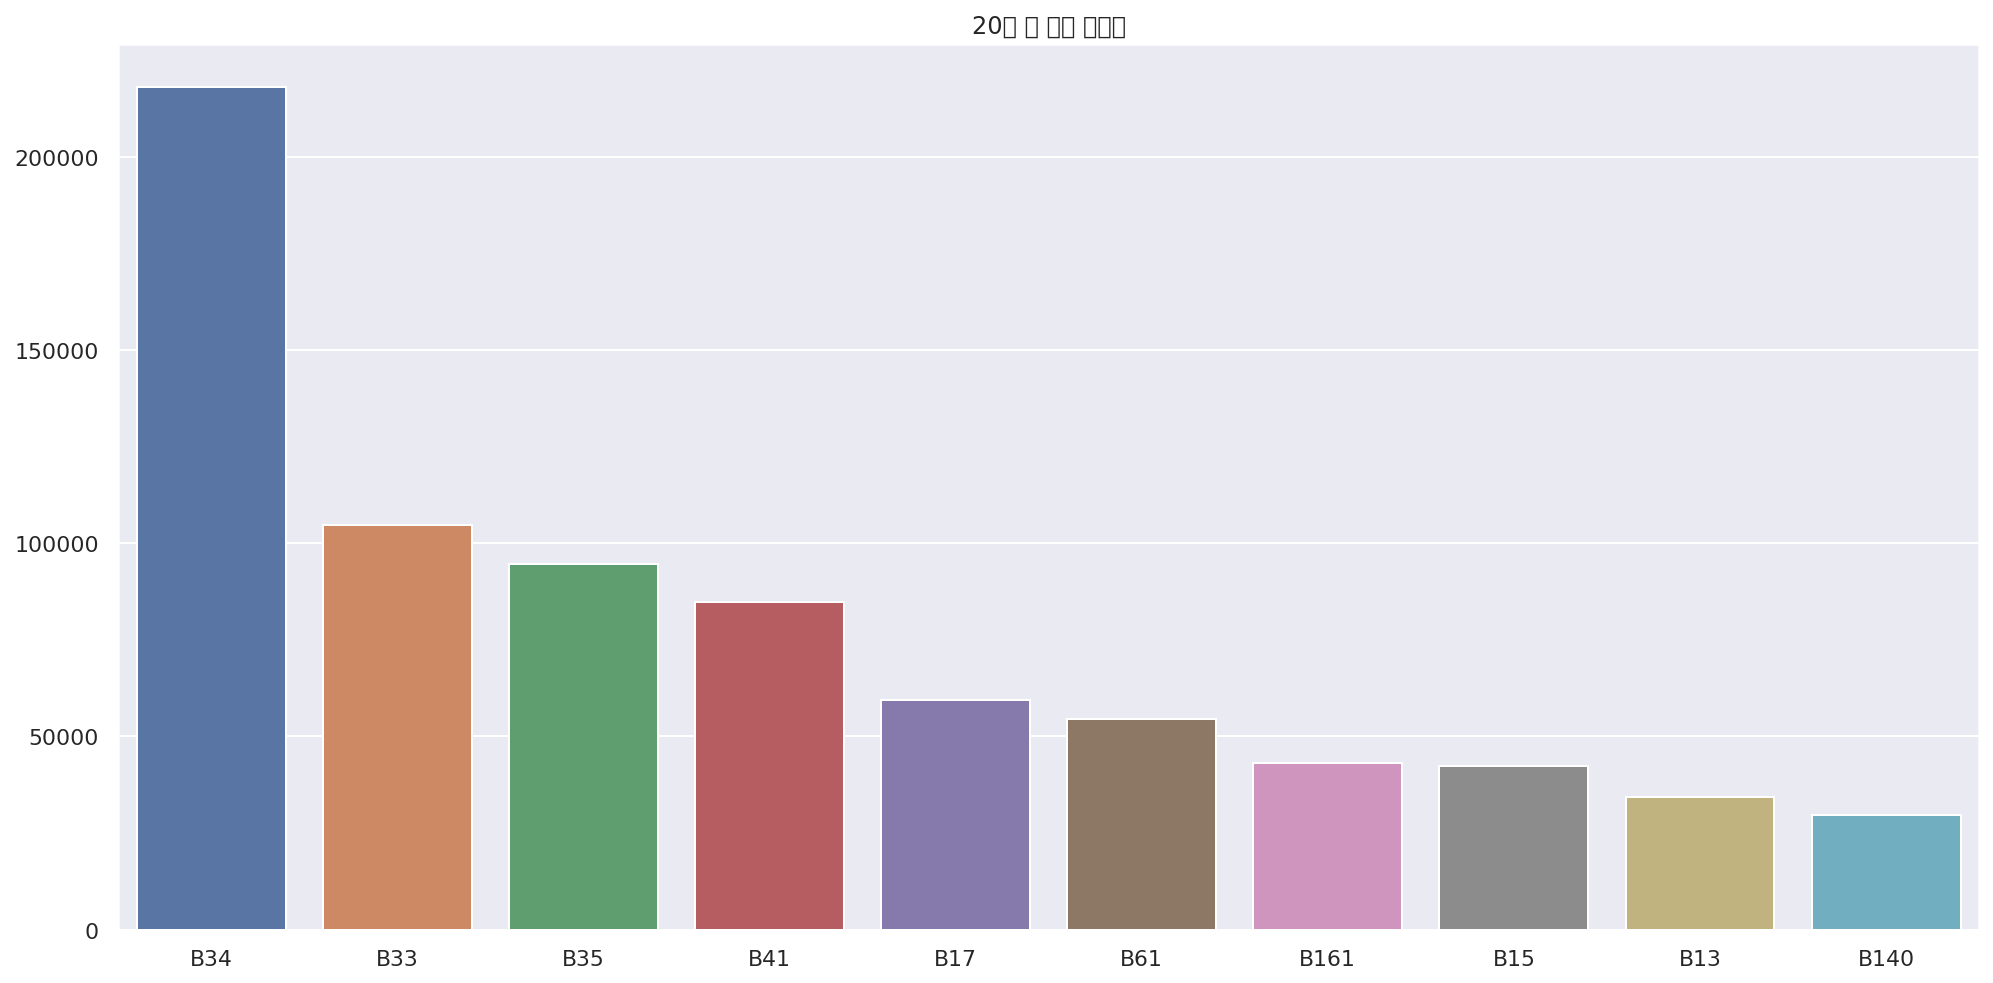

In [ ]:
# # 연령에 따른 소비
# plt.figure(figsize=(14,7))
# bill_mean_20_h = df_b.iloc[idx_20_h, :-1].mean().round(3).sort_values(
#     ascending=False)[:10]
# plt.title("20대 초 평균 지출액")
# sns.barplot(x=bill_mean_20_h.index, y=bill_mean_20_h.values)
# plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

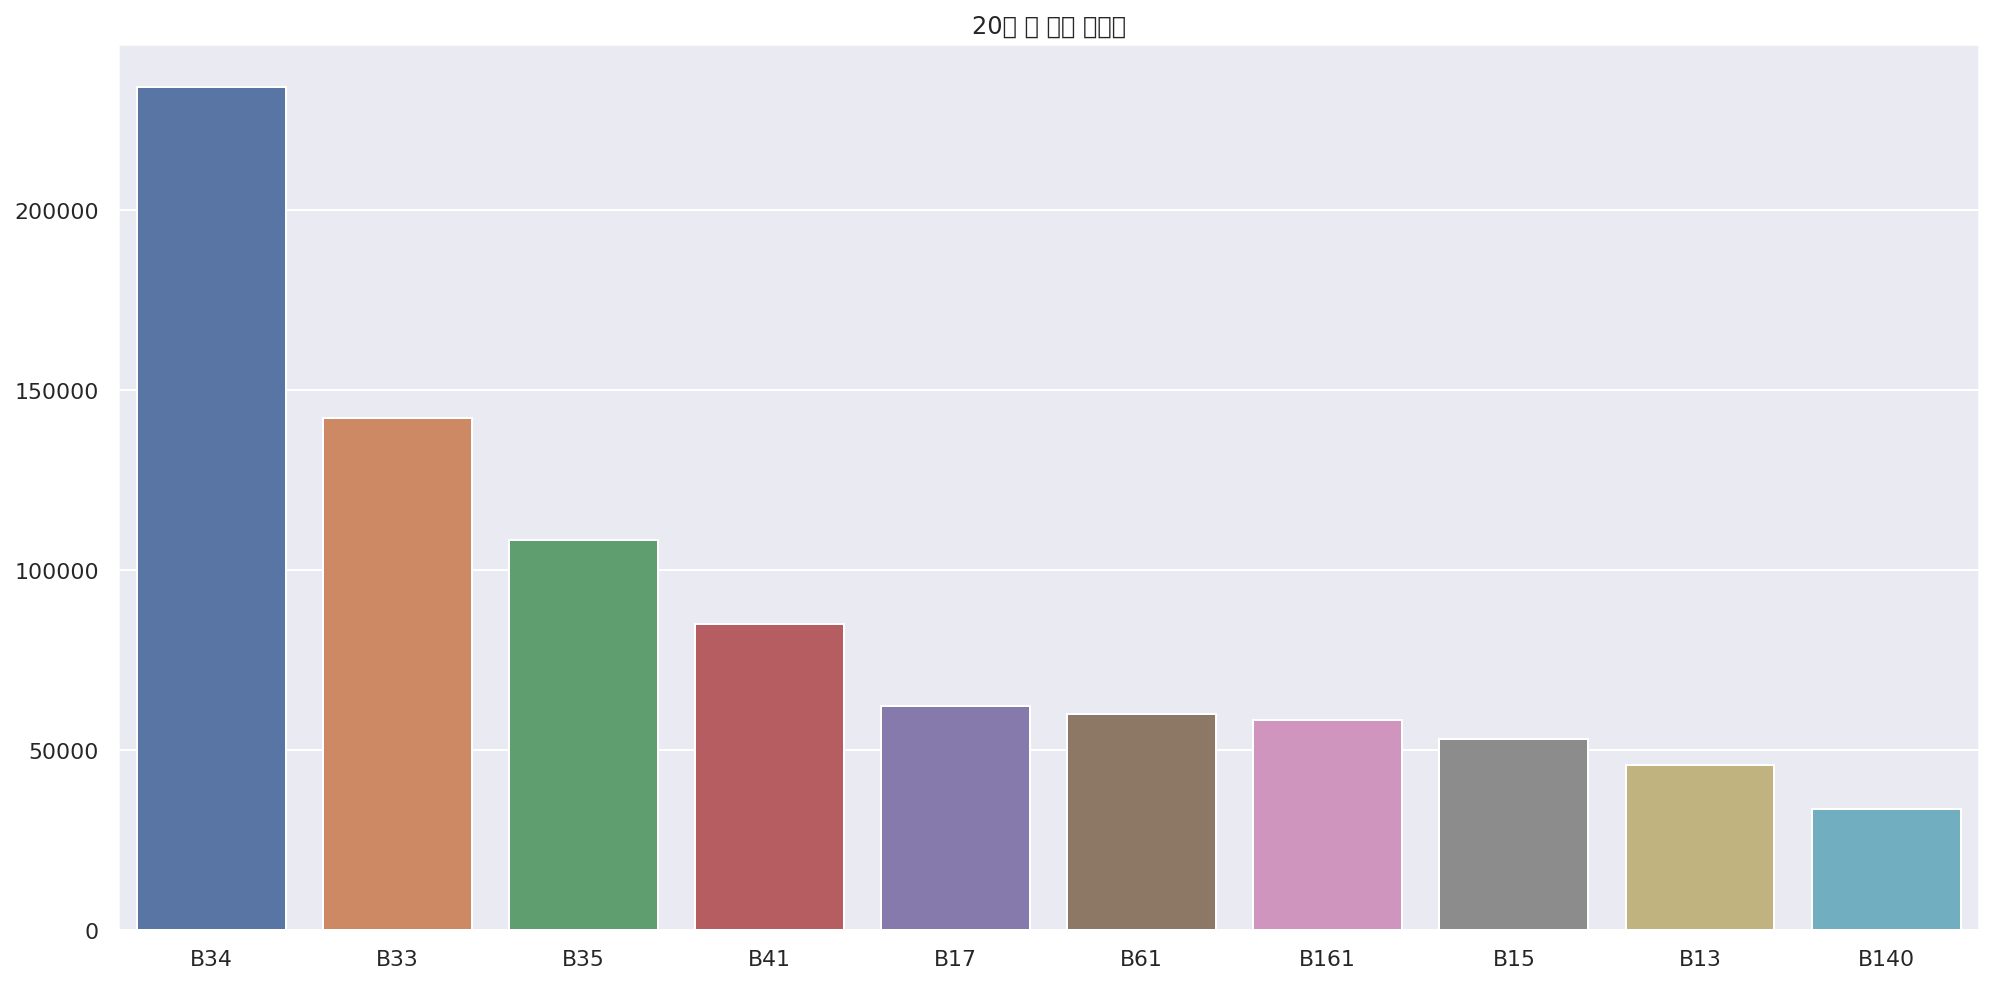

In [ ]:
# plt.figure(figsize=(14,7))
# bill_mean_20_t = df_b.iloc[idx_20_t, :-1].mean().round(3).sort_values(
#     ascending=False)[:10]
# plt.title("20대 후 평균 지출액")
# sns.barplot(x=bill_mean_20_t.index, y=bill_mean_20_t.values)
# plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

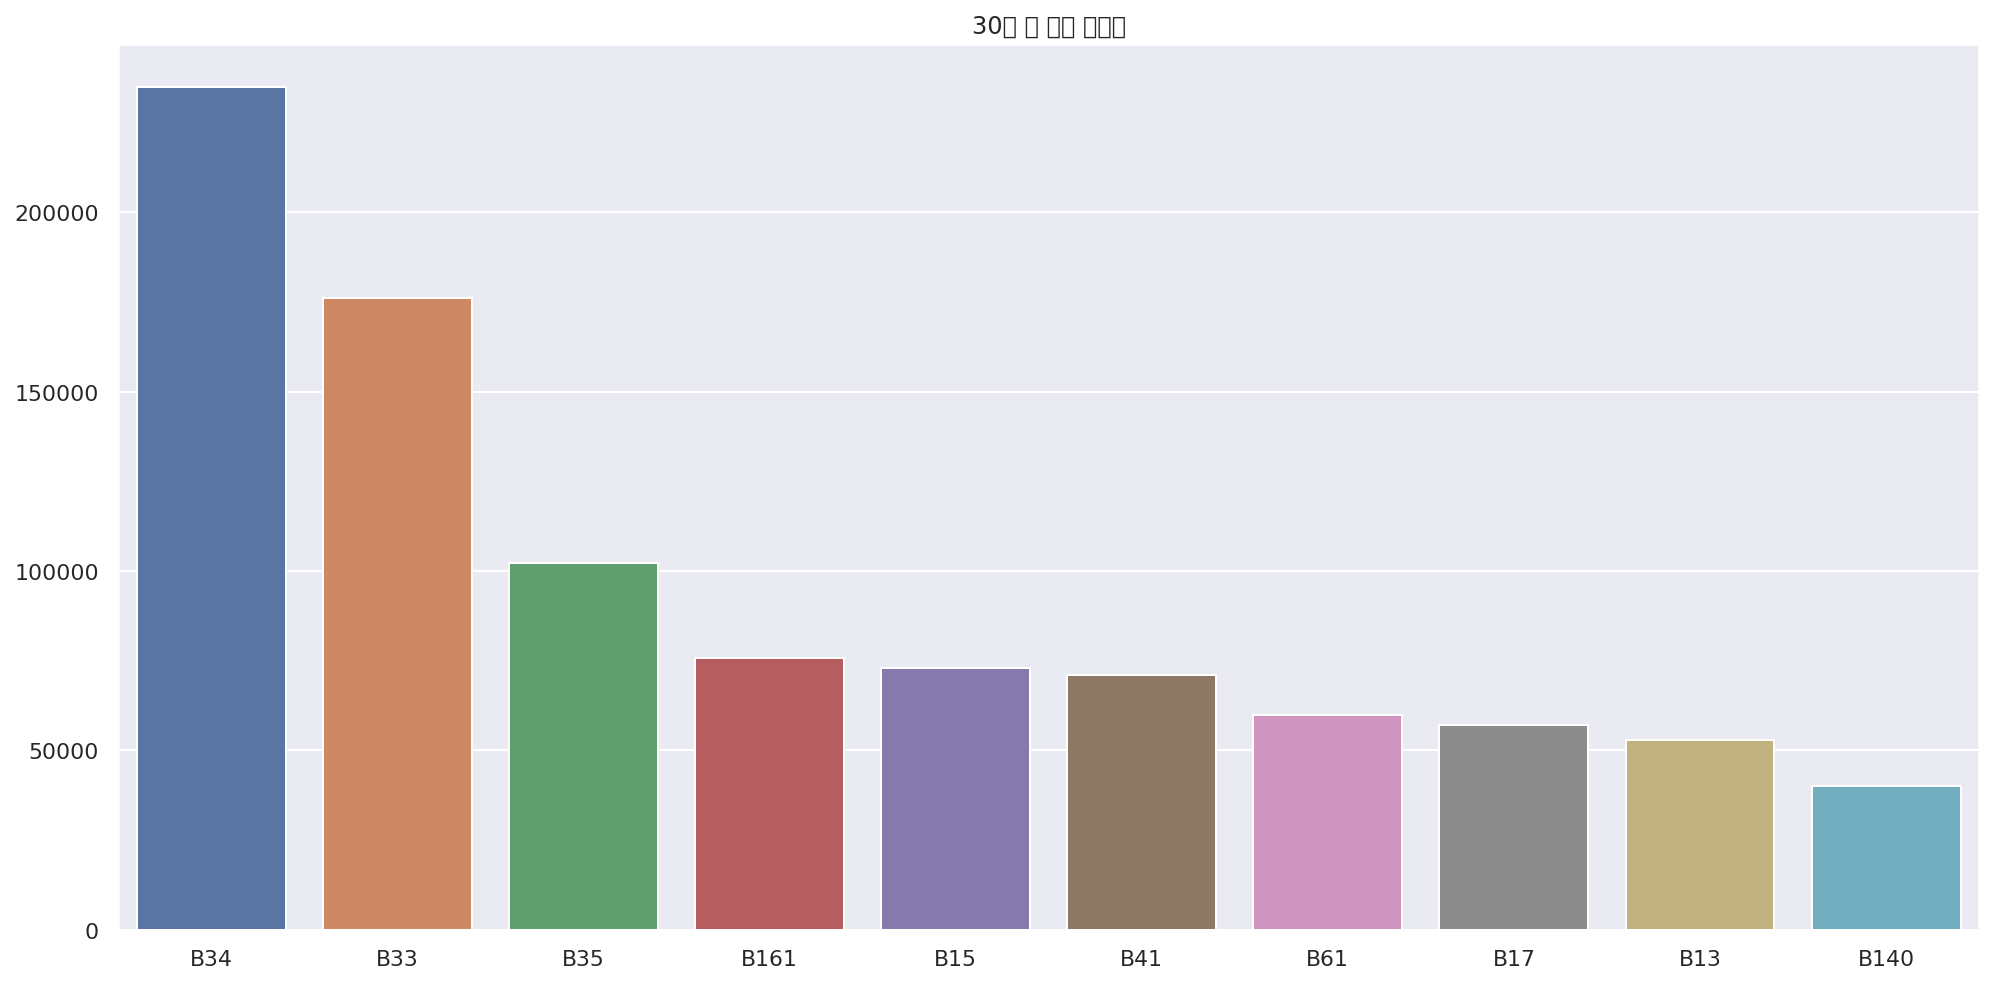

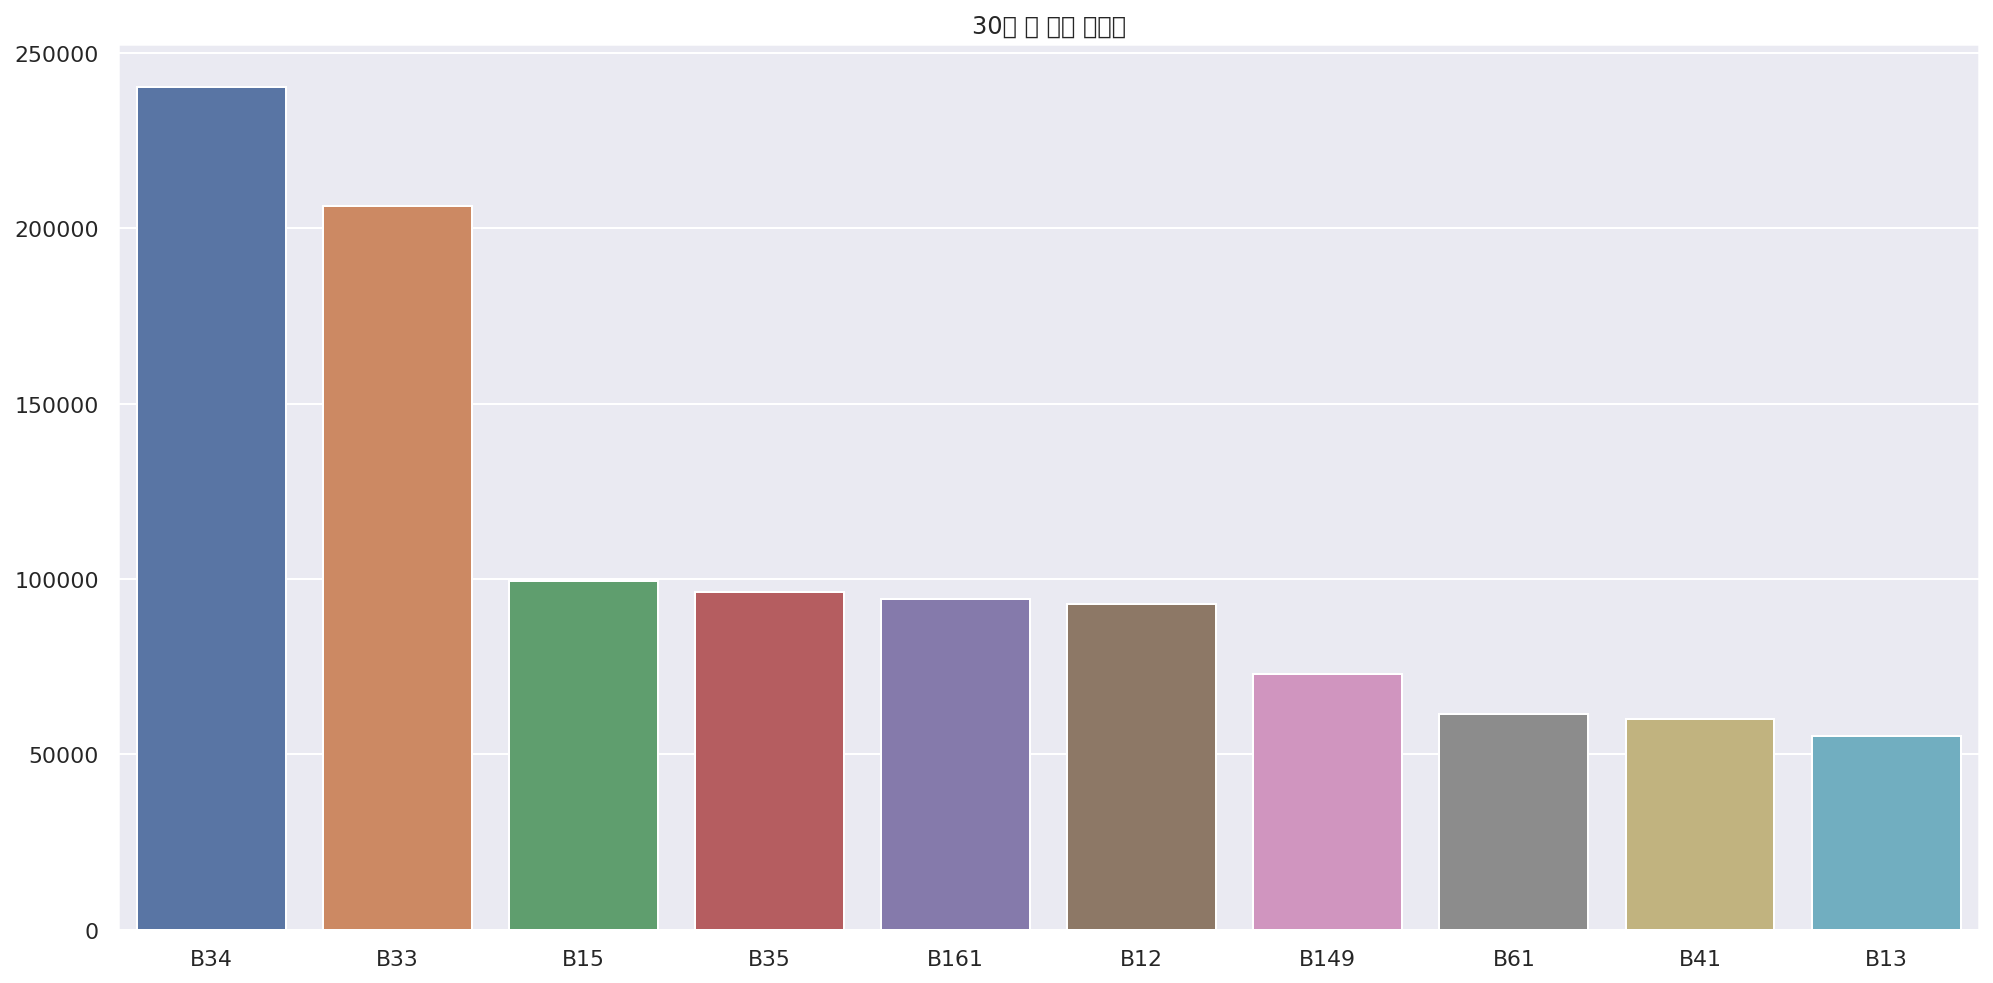

In [ ]:
# plt.figure(figsize=(14,7))
# bill_mean_30_h = df_b.iloc[idx_30_h, :-1].mean().round(3).sort_values(
#     ascending=False)[:10]
# plt.title("30대 초 평균 지출액")
# sns.barplot(x=bill_mean_30_h.index, y=bill_mean_30_h.values)
# plt.tight_layout()

# plt.figure(figsize=(14,7))
# bill_mean_30_t = df_b.iloc[idx_30_t, :-1].mean().round(3).sort_values(
#     ascending=False)[:10]
# plt.title("30대 후 평균 지출액")
# sns.barplot(x=bill_mean_30_t.index, y=bill_mean_30_t.values)
# plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

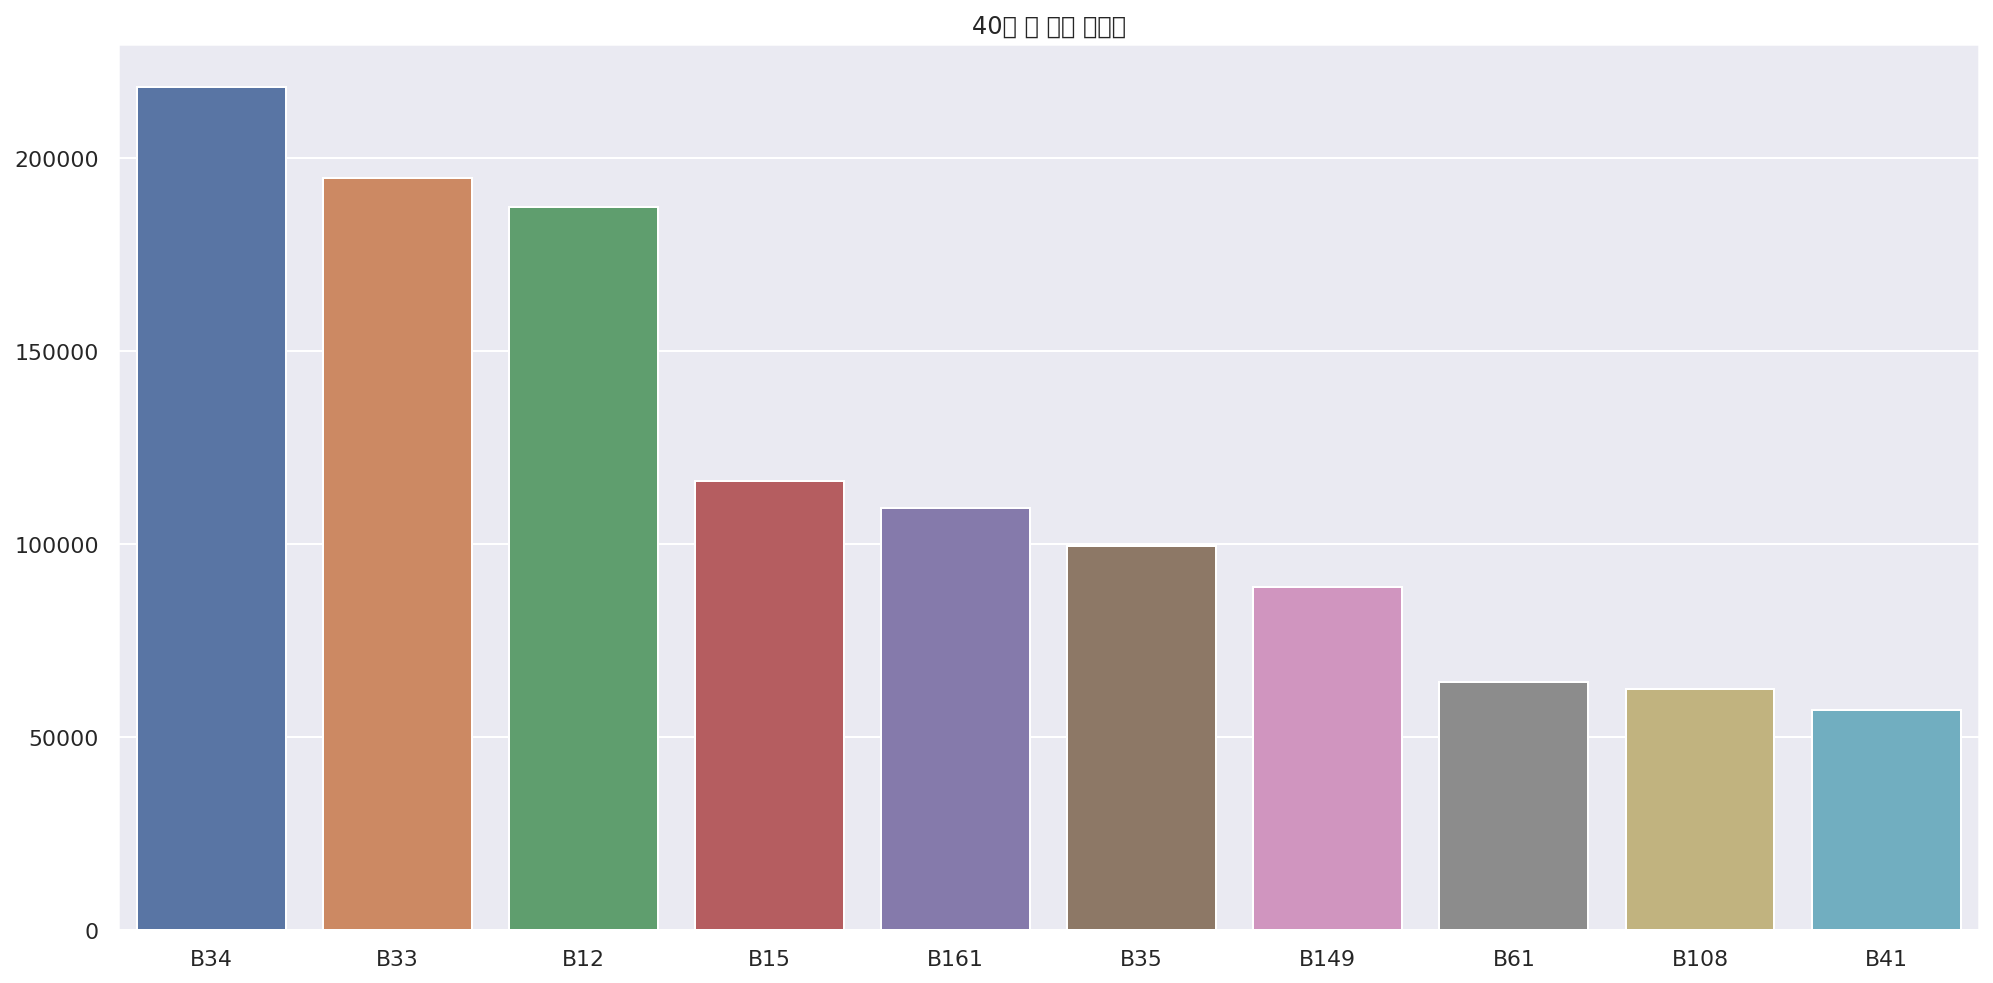

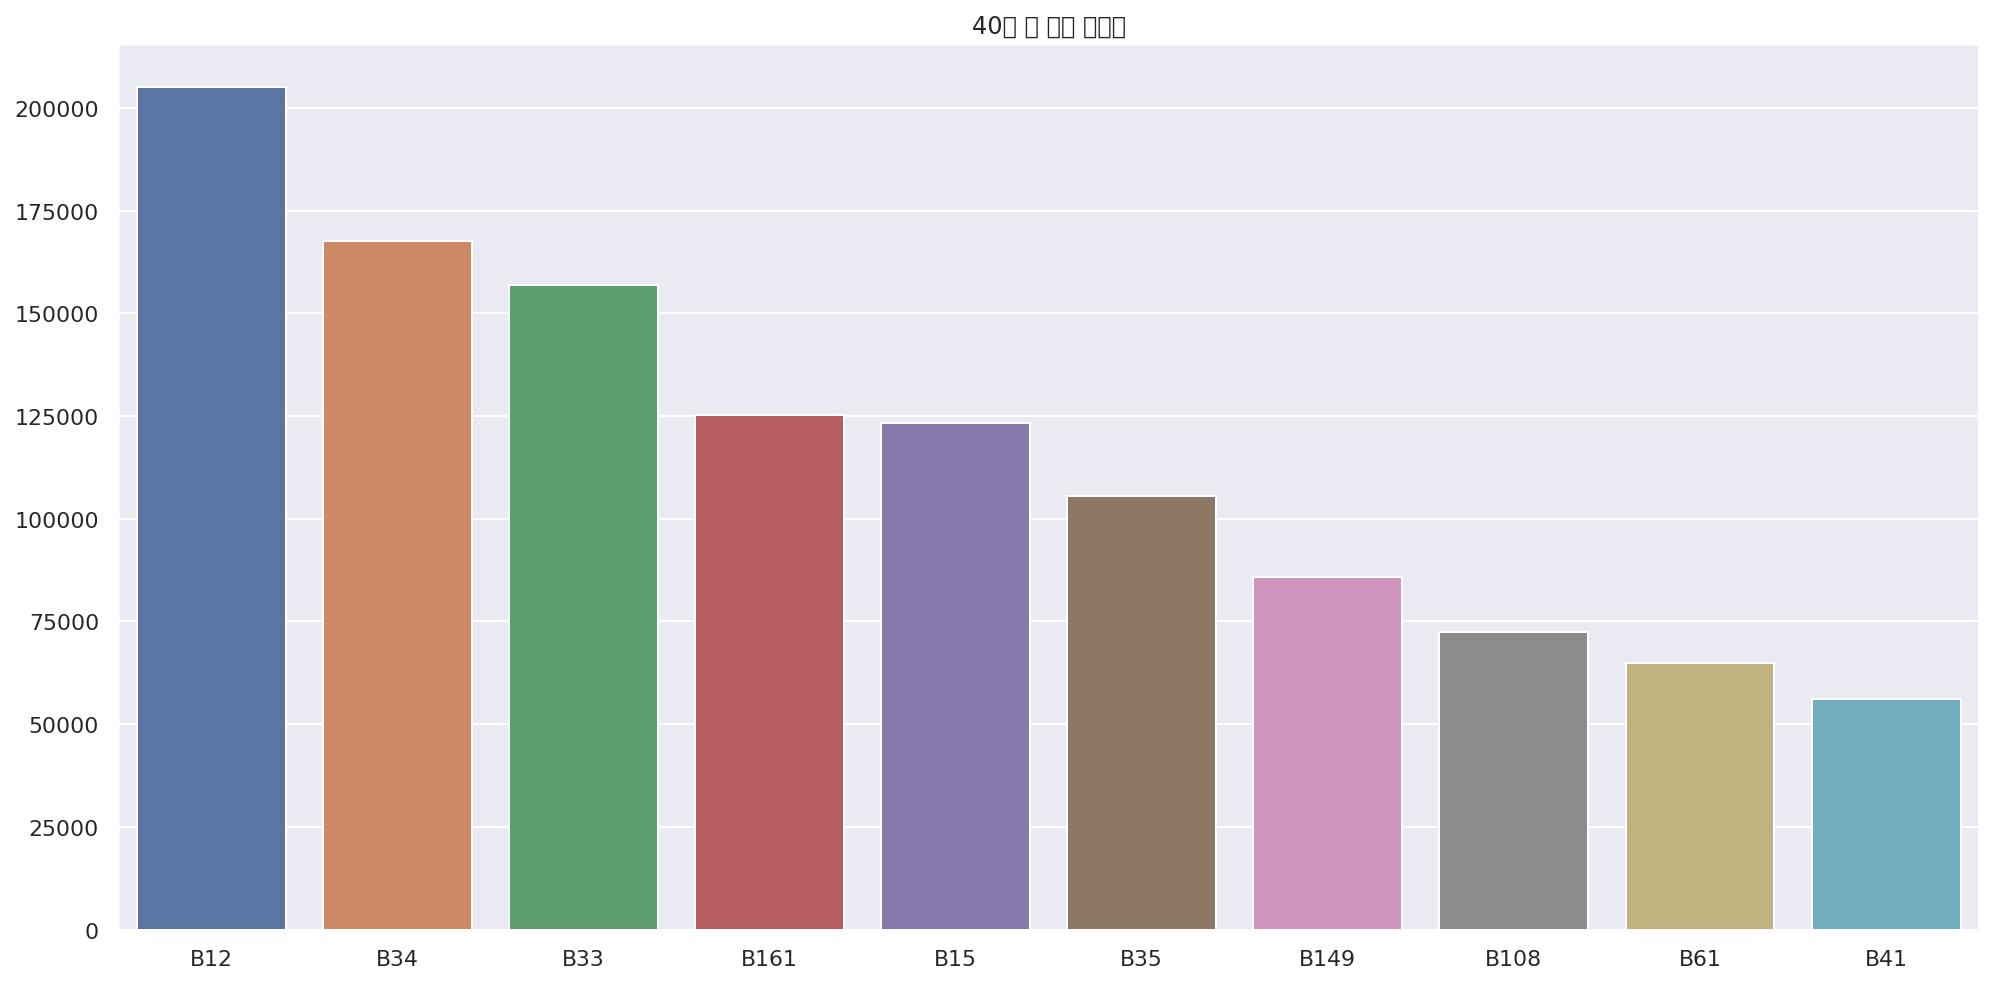

In [ ]:
# plt.figure(figsize=(14,7))
# bill_mean_40_h = df_b.iloc[idx_40_h, :-1].mean().round(3).sort_values(
#     ascending=False)[:10]
# plt.title("40대 초 평균 지출액")
# sns.barplot(x=bill_mean_40_h.index, y=bill_mean_40_h.values)
# plt.tight_layout()

# plt.figure(figsize=(14,7))
# bill_mean_40_t = df_b.iloc[idx_40_t, :-1].mean().round(3).sort_values(
#     ascending=False)[:10]
# plt.title("40대 후 평균 지출액")
# sns.barplot(x=bill_mean_40_t.index, y=bill_mean_40_t.values)
# plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

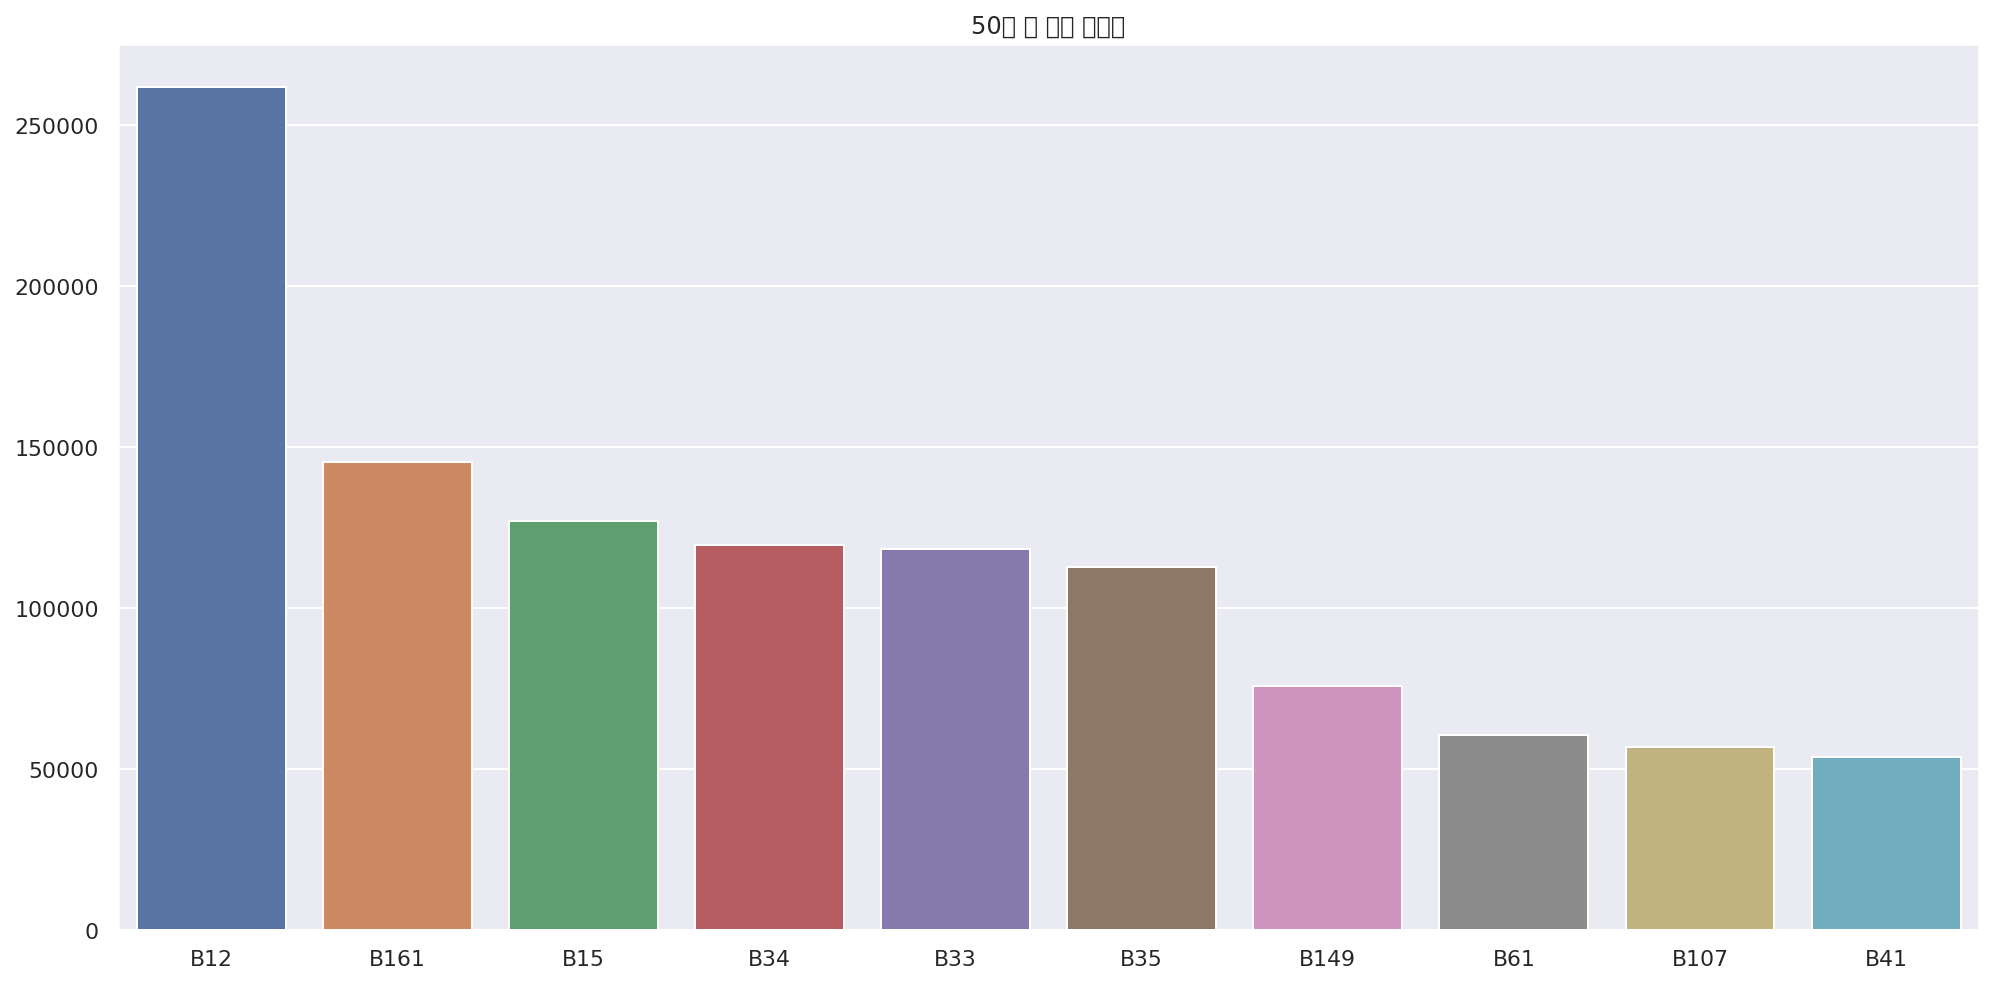

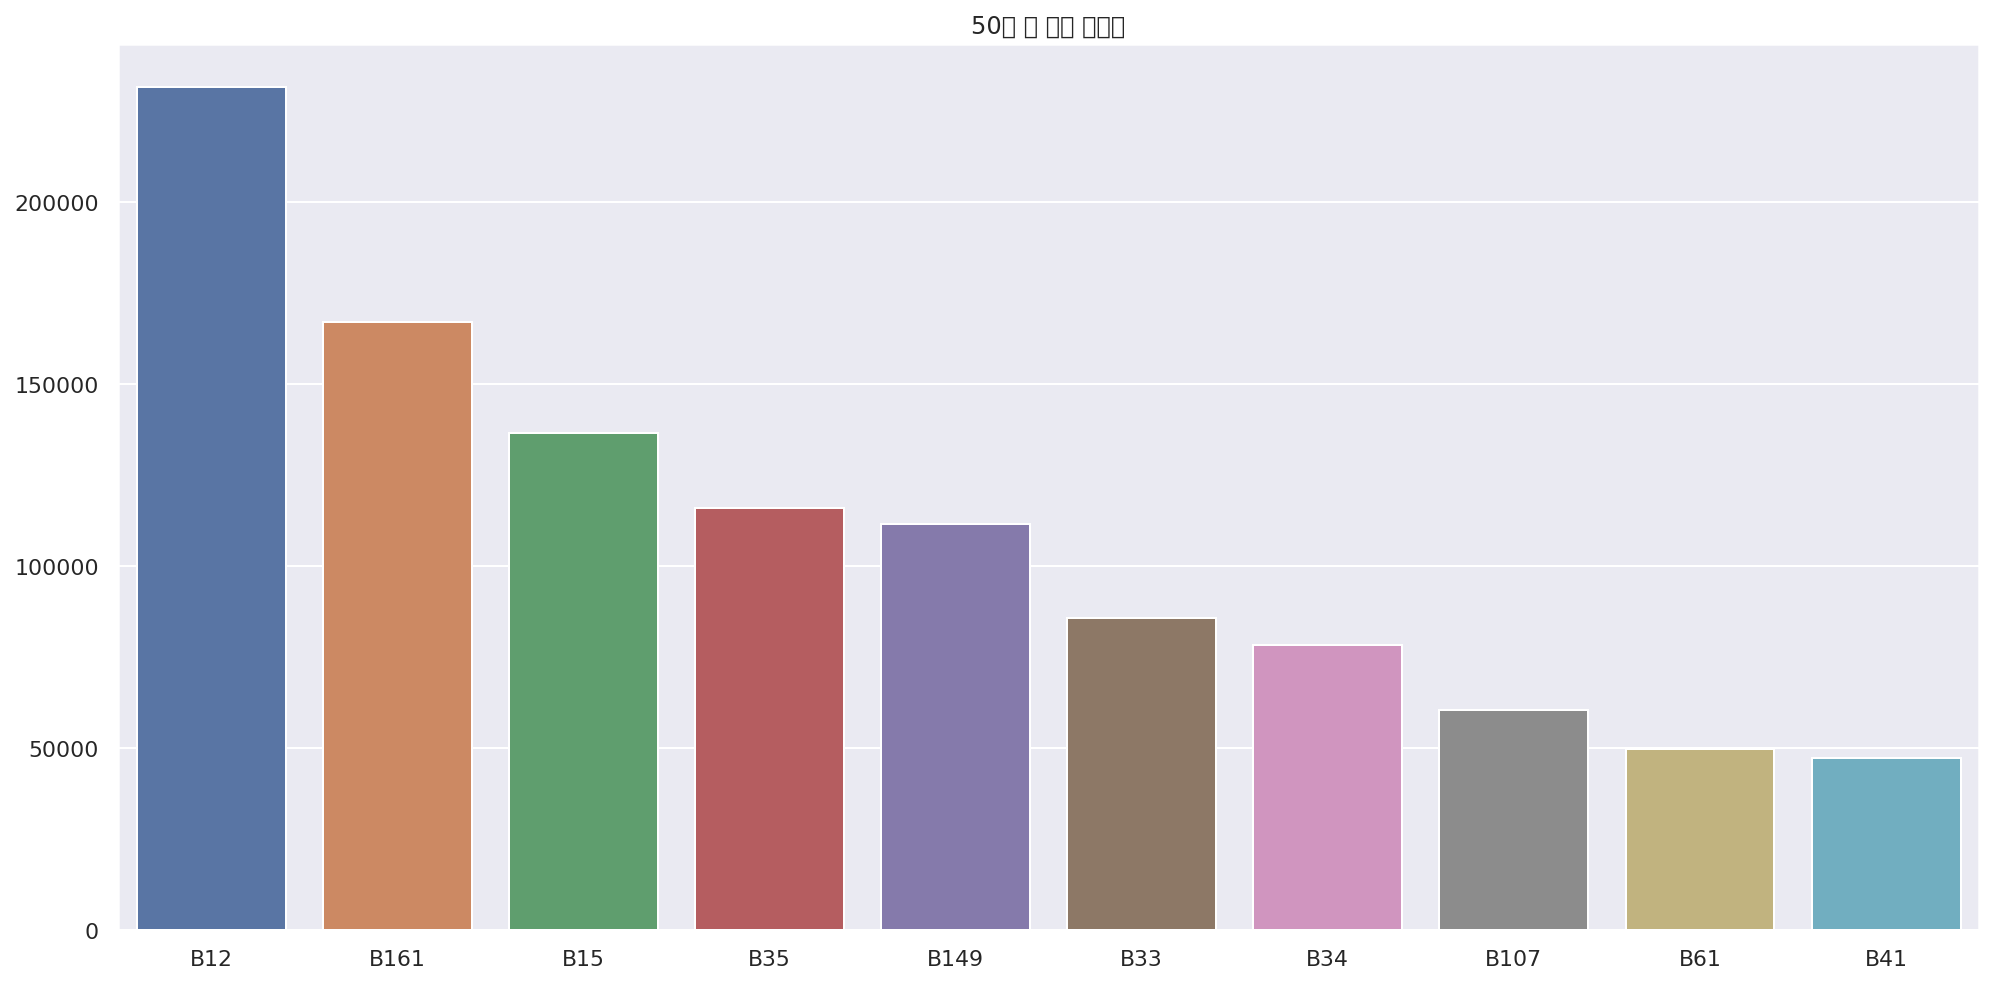

In [ ]:
# plt.figure(figsize=(14,7))
# bill_mean_50_h = df_b.iloc[idx_50_h, :-1].mean().round(3).sort_values(
#     ascending=False)[:10]
# plt.title("50대 초 평균 지출액")
# sns.barplot(x=bill_mean_50_h.index, y=bill_mean_50_h.values)
# plt.tight_layout()

# plt.figure(figsize=(14,7))
# bill_mean_50_t = df_b.iloc[idx_50_t, :-1].mean().round(3).sort_values(
#     ascending=False)[:10]
# plt.title("50대 후 평균 지출액")
# sns.barplot(x=bill_mean_50_t.index, y=bill_mean_50_t.values)
# plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

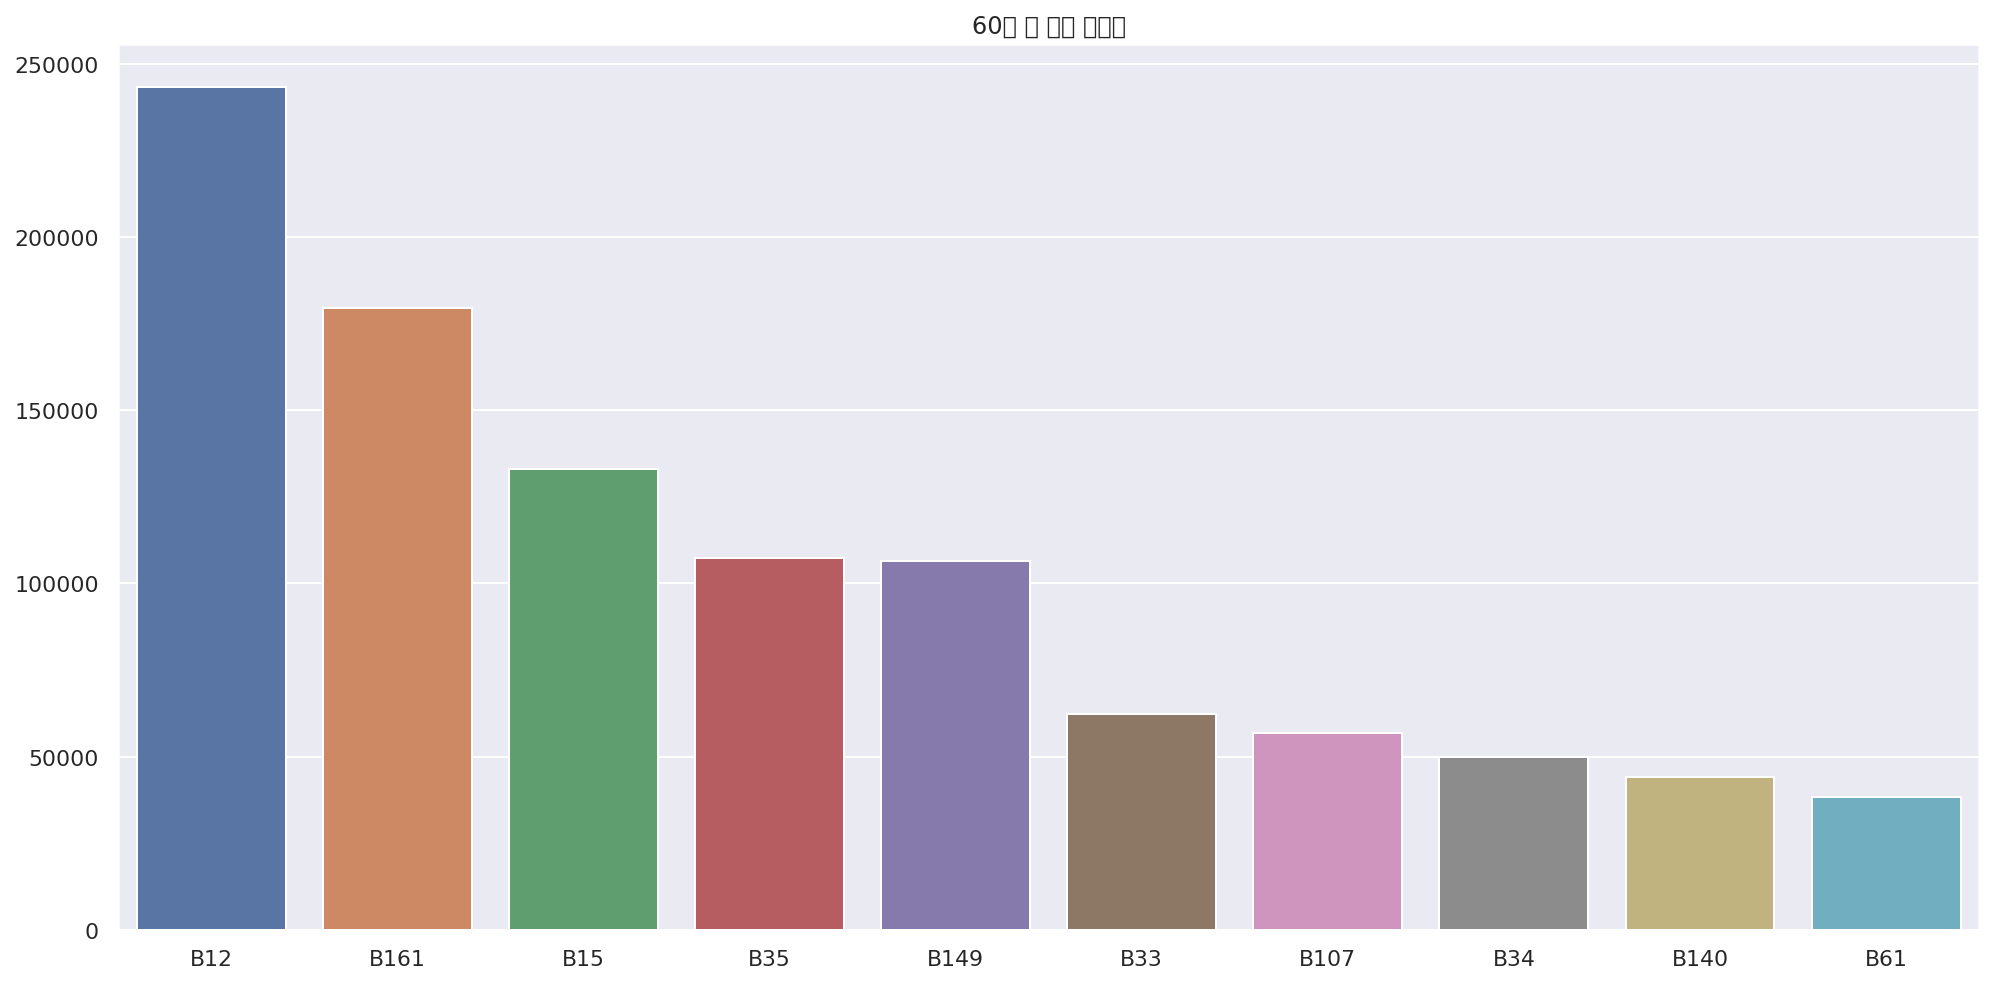

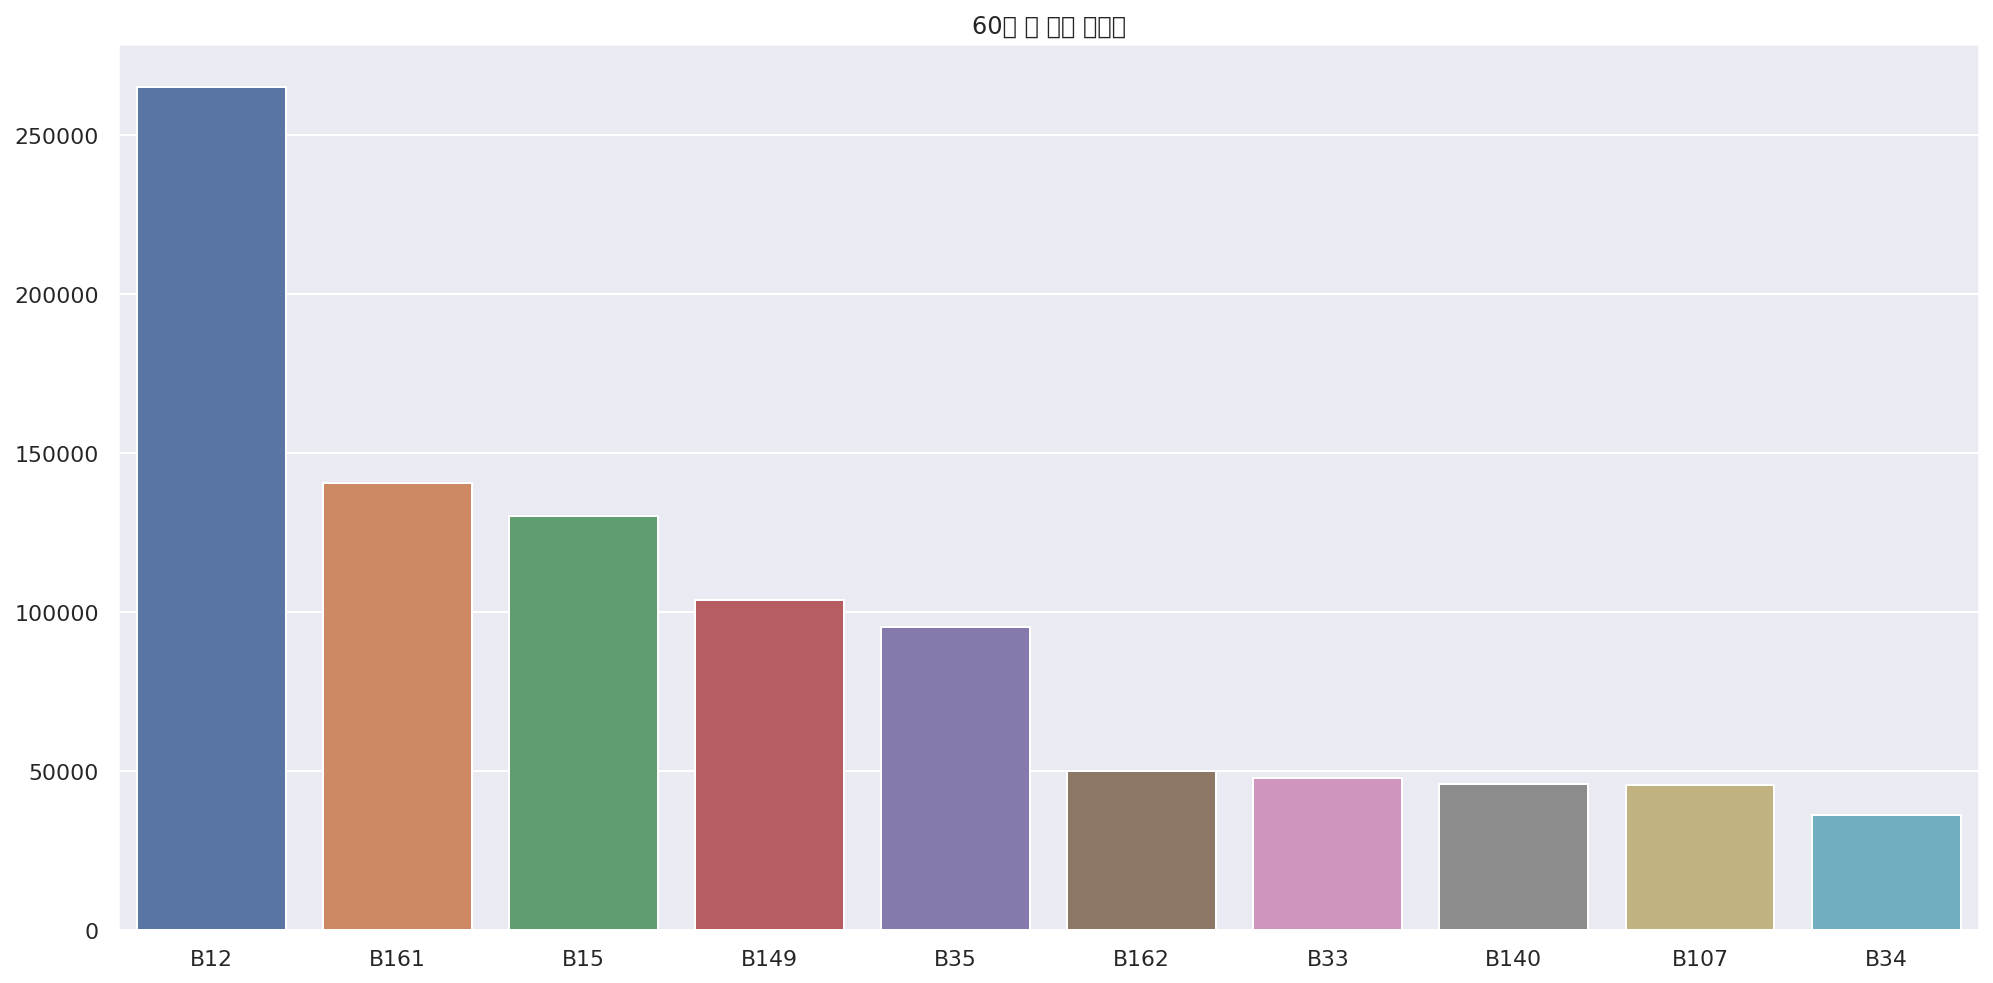

In [ ]:
# plt.figure(figsize=(14,7))
# bill_mean_60_h = df_b.iloc[idx_60_h, :-1].mean().round(3).sort_values(
#     ascending=False)[:10]
# plt.title("60대 초 평균 지출액")
# sns.barplot(x=bill_mean_60_h.index, y=bill_mean_60_h.values)
# plt.tight_layout()

# plt.figure(figsize=(14,7))
# bill_mean_60_t = df_b.iloc[idx_60_t, :-1].mean().round(3).sort_values(
#     ascending=False)[:10]
# plt.title("60대 후 평균 지출액")
# sns.barplot(x=bill_mean_60_t.index, y=bill_mean_60_t.values)
# plt.tight_layout()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
d = df_p.copy()
age_2_code = {
    '20대_초': 0,
    '30대_초': 1,
    '40대_초': 2,
    '50대_초': 3,
    '60대_초': 4,
    '20대_후': 0,
    '30대_후': 1,
    '40대_후': 2,
    '50대_후': 3,
    '60대_후': 4
}
d.P1 = [int(x=="M") for x in df_p.P1]
d.P2 = [age_2_code[x] for x in df_p.P2]
data_b = pd.concat([d.iloc[:,:2], df_b], axis=1)

NameError: ignored

In [ ]:
data_b

,P1,P2,B1,B2,B3,B4,B5,B6,B7,B8,...,B158,B159,B160,B161,B162,B163,B164,B165,B166,B167
0,1,0,0,0,0,0,190000,0,101000,0,...,0,0,0,70000,76000,0,0,0,0,4350000
1,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,580000
2,1,2,0,0,0,0,0,0,0,1000,...,0,0,0,0,110000,0,19000,0,0,1950000
3,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43000000
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,20000,0,0,0,0,0,4910000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,650000
473224,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4790000
473225,0,2,0,0,0,0,0,0,0,27000,...,0,0,0,95000,0,0,0,0,0,1650000
473226,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,14000,0,0,1340000


In [ ]:
#데이터 나누기

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B158,B159,B160,B161,B162,B163,B164,B165,B166,B167
0,0,0,0,0,190000,0,101000,0,54000,0,...,0,0,0,70000,76000,0,0,0,0,4350000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,580000
2,0,0,0,0,0,0,0,1000,0,0,...,0,0,0,0,110000,0,19000,0,0,1950000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43000000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,20000,0,0,0,0,0,4910000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,650000
473224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4790000
473225,0,0,0,0,0,0,0,27000,0,0,...,0,0,0,95000,0,0,0,0,0,1650000
473226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,14000,0,0,1340000


In [ ]:
# # X_train, y_train - 70%
# x_train, x_test, y_train, y_test = train_test_split(input_ids, 
#                                                   train_['labels'], 
#                                                   test_size=0.30, 
#                                                   random_state=12345,
#                                                   stratify = train_['labels'])
    

# # x_val, y_val - 10%
# # x_test, y_test - 20%
# x_val, x_test, y_val, y_test = train_test_split(x_test, 
#                                                   y_test, 
#                                                   test_size=0.66, 
#                                                   random_state=12345, 
#                                                   stratify=y_test)
# print("x_train: {}개,\ty_train: {}개".format(len(x_train), len(y_train)))
# print("x_test: {}개,\ty_test: {}개".format(len(x_test), len(y_test)))

In [ ]:
q1 = temp_dat['C1'].quantile(q=0.25, interpolation='nearest')  # q1 quantile
q2 = temp_dat['C1'].quantile(q=0.5, interpolation='nearest')  # q2 quantile
q3 = temp_dat['C1'].quantile(q=0.75, interpolation='nearest')  # q3 quantile
q4 = temp_dat['C1'].quantile(q=0.8, interpolation='nearest')  # q4 quantile
q5 = temp_dat['C1'].quantile(q=0.85, interpolation='nearest')  # q5 quantile
q6 = temp_dat['C1'].quantile(q=0.9, interpolation='nearest')  # q6 quantile
 



# 매출을 구간에 따라 나눠줌 (sell_rank 열에 넣어줌)
tnum_rank = pd.cut(temp_dat['C1'],
                   bins=[0, q1, q2, q3, q4, q5, q6,  np.inf],
                   right=False,
                   labels=["7등급","6등급","5등급","4등급", "3등급", "2등급", "1등급"])
temp_dat["tnum_rank"] = tnum_rank


In [ ]:
ori_dat = temp_dat.iloc[:,:-20]
def solution(n):
    N = [int(i) for i in str(n)]
    return sum(N)
    
ori_dat["E1 사용횟수"] = ori_dat["E1"].apply(lambda x: solution(int(x)))
ori_dat["E2 사용횟수"] = ori_dat["E2"].apply(lambda x: solution(int(x)))
ori_dat["E3 사용횟수"] = ori_dat["E3"].apply(lambda x: solution(int(x)))
ori_dat["E4 사용횟수"] = ori_dat["E4"].apply(lambda x: solution(int(x)))
ori_dat["E5 사용횟수"] = ori_dat["E5"].apply(lambda x: solution(int(x)))
ori_dat["E6 사용횟수"] = ori_dat["E6"].apply(lambda x: solution(int(x)))
ori_dat

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,E5,E6,숙박,식료품,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,1.111110e+11,1.100000e+09,190000,1457000,0,0,10,0,6,2
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,1.111100e+11,1.000000e+10,0,347000,0,0,0,0,5,1
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,1.111010e+11,1.011010e+11,0,408000,0,8,0,0,5,4
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,1.111110e+11,1.111110e+11,0,14000,0,0,0,0,6,6
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,1.111110e+11,1.111110e+11,0,0,0,6,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,F,40대_초,0,1,0,1,B은행,0,0,0,...,1.111110e+11,1.011111e+10,0,9000,6,4,0,0,6,8
473224,M,20대_후,1,1,0,0,A은행,0,0,0,...,1.111110e+11,1.111110e+11,0,203000,0,4,0,0,6,6
473225,F,40대_후,1,1,1,0,B은행,0,0,0,...,1.111110e+11,1.111110e+11,0,404000,0,4,0,0,6,6
473226,M,60대_후,1,1,1,0,A은행,0,0,0,...,1.111110e+11,1.101010e+11,0,193000,0,3,0,0,6,4


In [ ]:
data_try = pd.concat([temp_dat["consume_rank"], temp_dat["tnum_rank"], ori_dat.loc[:, ["E1 사용횟수", "E3 사용횟수", "E4 사용횟수", "E5 사용횟수", "E6 사용횟수"]], temp_dat["C1"]
], axis=1)
data_try

,consume_rank,tnum_rank,E1 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수,C1
0,1등급,1등급,0,10,0,6,2,210
1,7등급,5등급,0,0,0,5,1,40
2,5등급,5등급,0,0,0,5,4,50
3,1등급,5등급,0,0,0,6,6,50
4,1등급,5등급,0,0,0,6,6,40
...,...,...,...,...,...,...,...,...
473223,7등급,6등급,6,0,0,6,8,30
473224,1등급,5등급,0,0,0,6,6,50
473225,5등급,5등급,0,0,0,6,6,60
473226,5등급,5등급,0,0,0,6,4,50


In [ ]:
# data_try = pd.concat([temp_dat["consume_rank"], temp_dat["tnum_rank"],  temp_dat["C1"]], axis=1)
# data_try

,consume_rank,tnum_rank,C1
0,1등급,1등급,210
1,7등급,5등급,40
2,5등급,5등급,50
3,1등급,5등급,50
4,1등급,5등급,40
...,...,...,...
473223,7등급,6등급,30
473224,1등급,5등급,50
473225,5등급,5등급,60
473226,5등급,5등급,50


In [ ]:
data_try

,consume_rank,tnum_rank,E1,E3,E4,E5,E6,C1
0,100,50,0.000000e+00,1.111111e+10,0,1.111110e+11,1.100000e+09,210
1,20,20,0.000000e+00,0.000000e+00,0,1.111100e+11,1.000000e+10,40
2,40,20,0.000000e+00,0.000000e+00,0,1.111010e+11,1.011010e+11,50
3,100,20,0.000000e+00,0.000000e+00,0,1.111110e+11,1.111110e+11,50
4,100,20,0.000000e+00,0.000000e+00,0,1.111110e+11,1.111110e+11,40
...,...,...,...,...,...,...,...,...
473223,20,15,1.111110e+11,0.000000e+00,0,1.111110e+11,1.011111e+10,30
473224,100,20,0.000000e+00,0.000000e+00,0,1.111110e+11,1.111110e+11,50
473225,40,20,0.000000e+00,0.000000e+00,0,1.111110e+11,1.111110e+11,60
473226,40,20,0.000000e+00,0.000000e+00,0,1.111110e+11,1.101010e+11,50


In [ ]:
#종속변수 생성

rate = {
    '1등급': 100,
    '2등급': 70,
    '3등급': 60,
    '4등급': 50,
    '5등급': 40,
    '6등급': 30,
    '7등급': 20}
ntrial = {
     '1등급': 50,
     '2등급': 35,
     '3등급': 30,
     '4등급': 25,
     '5등급': 20,
     '6등급': 15,
     '7등급': 10}
data_try.consume_rank = [rate[x] for x in data_try.consume_rank]
data_try.tnum_rank = [ntrial[x] for x in data_try.tnum_rank]




In [ ]:
data_try2 = data_try.loc[:, ["E1 사용횟수", "E3 사용횟수", "E4 사용횟수", "E5 사용횟수", "E6 사용횟수"]]

In [ ]:
# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data_try2)
data_scale

array([[0.        , 0.90909091, 0.        , 0.54545455, 0.18181818],
       [0.        , 0.        , 0.        , 0.45454545, 0.09090909],
       [0.        , 0.        , 0.        , 0.45454545, 0.36363636],
       ...,
       [0.        , 0.        , 0.        , 0.54545455, 0.54545455],
       [0.        , 0.        , 0.        , 0.54545455, 0.36363636],
       [0.        , 0.        , 0.        , 0.36363636, 0.09090909]])

In [ ]:
data_try.loc[:, "E1 사용횟수"] =  data_scale.T[0]
data_try.loc[:, "E3 사용횟수"] =  data_scale.T[1]
data_try.loc[:, "E4 사용횟수"] =  data_scale.T[2]
data_try.loc[:, "E5 사용횟수"] =  data_scale.T[3]
data_try.loc[:, "E6 사용횟수"] =  data_scale.T[4]
data_try

,consume_rank,tnum_rank,E1 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수,C1
0,100,50,0.000000,0.909091,0.0,0.545455,0.181818,210
1,20,20,0.000000,0.000000,0.0,0.454545,0.090909,40
2,40,20,0.000000,0.000000,0.0,0.454545,0.363636,50
3,100,20,0.000000,0.000000,0.0,0.545455,0.545455,50
4,100,20,0.000000,0.000000,0.0,0.545455,0.545455,40
...,...,...,...,...,...,...,...,...
473223,20,15,0.545455,0.000000,0.0,0.545455,0.727273,30
473224,100,20,0.000000,0.000000,0.0,0.545455,0.545455,50
473225,40,20,0.000000,0.000000,0.0,0.545455,0.545455,60
473226,40,20,0.000000,0.000000,0.0,0.545455,0.363636,50


In [ ]:
#가중치 곱해주기
data_try["E1 사용횟수"] = data_try["E1 사용횟수"] * 50 
data_try["E3 사용횟수"] = data_try["E3 사용횟수"] * 30
data_try["E4 사용횟수"] = data_try["E4 사용횟수"] * 30
data_try["E5 사용횟수"] = data_try["E5 사용횟수"] * 50
data_try["E6 사용횟수"] = data_try["E6 사용횟수"] * 100

In [ ]:
data_try.iloc[:, 0:-1]

,consume_rank,tnum_rank,E1,E3,E4,E5,E6
0,100,50,0.0,3.000003,0.0,50.000000,9.900010e-01
1,20,20,0.0,0.000000,0.0,49.999550,9.000009e+00
2,40,20,0.0,0.000000,0.0,49.995500,9.099099e+01
3,100,20,0.0,0.000000,0.0,50.000000,1.000000e+02
4,100,20,0.0,0.000000,0.0,50.000000,1.000000e+02
...,...,...,...,...,...,...,...
473223,20,15,50.0,0.000000,0.0,50.000000,9.100009e+00
473224,100,20,0.0,0.000000,0.0,50.000000,1.000000e+02
473225,40,20,0.0,0.000000,0.0,50.000000,1.000000e+02
473226,40,20,0.0,0.000000,0.0,50.000000,9.909100e+01


Z_score 표준화

In [ ]:
data_try["Y"] = data_try.iloc[:, 0:-1].sum(axis=1)
mean =  data_try["Y"].mean()
std =  data_try["Y"].std()
std
data_Y = (data_try["Y"] - mean) / std
data_Y 
data_Y[data_Y >= 0] = 1
data_Y[data_Y < 0] = 0
#len(data_Y[data_Y == 0])
#len(data_Y[data_Y == 1])



In [ ]:
temp_x = temp_dat.iloc[:, 8:173]
temp_x

,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,...,B157,B158,B159,B160,B161,B162,B163,B164,B165,B166
0,0,0,0,190000,0,101000,0,54000,0,341000,...,0,0,0,0,70000,76000,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1000,0,0,0,...,0,0,0,0,0,110000,0,19000,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,20000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473224,0,0,0,0,0,0,0,0,0,156000,...,0,0,0,0,0,0,0,0,0,0
473225,0,0,0,0,0,0,27000,0,0,10000,...,0,0,0,0,95000,0,0,0,0,0
473226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14000,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(temp_x)
data_scale

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01583333, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01166667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

PCA + 종속변수 생성 

In [ ]:
# PCA 주성분분석
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_scale)
PC_score = pca.transform(data_scale)
PC_score.shape
# pca = PCA(random_state=1107)
# X_p = pca.fit_transform(data_scale)

# pd.Series(np.cumsum(pca.explained_variance_ratio_))

(473228, 165)

In [ ]:
clf2 = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf2.fit(PC_score[:,:35],data_Y)
pred = clf2.predict(PC_score[:,:35])
#confusion_matrix(data_Y,pred)
#10 : 0.68 , 20: 0.73 30: 0.7547 35:0.7553 40:0.75 

In [ ]:
print(clf2.score(PC_score[:,:35], data_Y))


0.7553399207147506


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(data_Y, clf2.predict(PC_score[:,:35]))
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(data_Y, clf2.predict(PC_score[:,:35])))

[[195937  42828]
 [ 72952 161511]]
              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77    238765
         1.0       0.79      0.69      0.74    234463

    accuracy                           0.76    473228
   macro avg       0.76      0.75      0.75    473228
weighted avg       0.76      0.76      0.75    473228



VIF-다중공선성 -> 시간 너무 오래걸림

In [ ]:
dfX = pd.DataFrame(data_scale)
dfy = pd.DataFrame(data_Y)

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# dfX = pd.DataFrame(data_scale)
# dfy = pd.DataFrame(data_Y)
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(data_scale, i) for i in range(data_scale.shape[1])]
# vif["features"] = dfX.columns
# vif = vif.sort_values("VIF Factor").reset_index(drop=True)
# vif

KeyboardInterrupt: ignored

스피어만 상관계수 -> 없음

In [ ]:
import scipy.stats as stats
corr = dfX.corr(method="spearman")
np.array(corr)


array([[ 1.00000000e+00,  2.12381574e-02,  1.13026502e-02, ...,
        -1.40502801e-03,  6.61813661e-04,  1.04482117e-03],
       [ 2.12381574e-02,  1.00000000e+00,  1.05445615e-02, ...,
        -2.53737314e-03,  1.85342982e-03,  1.34780565e-03],
       [ 1.13026502e-02,  1.05445615e-02,  1.00000000e+00, ...,
         3.05695381e-03,  6.11015861e-04,  1.03549186e-02],
       ...,
       [-1.40502801e-03, -2.53737314e-03,  3.05695381e-03, ...,
         1.00000000e+00, -1.80058158e-03,  2.58691552e-03],
       [ 6.61813661e-04,  1.85342982e-03,  6.11015861e-04, ...,
        -1.80058158e-03,  1.00000000e+00,  1.41235553e-02],
       [ 1.04482117e-03,  1.34780565e-03,  1.03549186e-02, ...,
         2.58691552e-03,  1.41235553e-02,  1.00000000e+00]])

NameError: ignored

등급 매기기 - 로지스틱회귀모형의 사후확률을 사용하여 계급별 배점을 매김


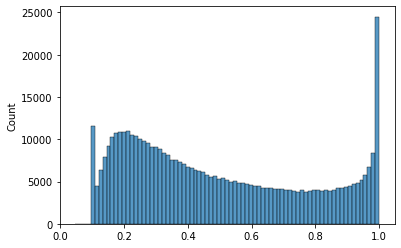

In [ ]:
p = clf2.predict_proba(PC_score[:,:35])
sns.histplot([x[1] for x in p])




In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_labels, model.predict(test_features))
fpr, tpr, thresholds = roc_curve(test_labels, model.predict_proba(test_features)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

그냥 로지스틱 (종속 변수 생성 시)

In [ ]:
 #X_train, y_train - 70%
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 x_train, x_test, y_train, y_test = train_test_split(temp_x, 
                                                   data_Y)
    

# x_val, y_val - 10%
# x_test, y_test - 20%
 x_val, x_test, y_val, y_test = train_test_split(x_test, 
                                                   y_test)
 print("x_train: {}개,\ty_train: {}개".format(len(x_train), len(y_train)))
 print("x_test: {}개,\ty_test: {}개".format(len(x_test), len(y_test)))


x_train: 354921개,	y_train: 354921개
x_test: 29577개,	y_test: 29577개


In [ ]:
len(y_train[y_train == 0])
len(y_train[y_train == 1])

175865

In [ ]:
y_train.value_counts()

0.0    179056
1.0    175865
Name: Y, dtype: int64

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# train_features = scaler.fit_transform(train_features)
# test_features = scaler.transform(test_features)
# train_features

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5486770295361503
0.5485343341109646


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, model.predict(x_test))
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

[[ 2186 12720]
 [  633 14038]]
              precision    recall  f1-score   support

         0.0       0.78      0.15      0.25     14906
         1.0       0.52      0.96      0.68     14671

    accuracy                           0.55     29577
   macro avg       0.65      0.55      0.46     29577
weighted avg       0.65      0.55      0.46     29577



In [ ]:
# data_scale = pd.concat([data_try.loc[:, ["consume_rank", "tnum_rank"]]], axis=1)

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 10
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 5번마다 로그 출력
    if epoch % 5 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

RuntimeError: ignored